# Multiple Linear Regression
## Housing Case Study

#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:


- Which variables are significant in predicting the price of a car

- How well those variables describe the price of a car


## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
car_prices = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
# Check the head of the dataset
car_prices.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


#### Inspect the various aspects of the housing dataframe

In [5]:
car_prices.shape

(205, 26)

In [6]:
car_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
car_prices.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Step 2: Data Cleaning

    - Remove car model name from company name in 'CarName' column 
    - Handle inconsistencies in company names
    - Change object type data to categorical type

In [8]:
# Let's remove the model name from the car company name 
# Since all carnames except  alpha are separated by their model names by a space, 
# we first split the CarName column values by space,
# followed by '-' to take into account the company name 'alpha'
car_prices['CarName'] = car_prices['CarName'].apply(lambda x: x.split(' ')[0].split('-')[0])
car_prices['CarName'].head(10)

0    alfa
1    alfa
2    alfa
3    audi
4    audi
5    audi
6    audi
7    audi
8    audi
9    audi
Name: CarName, dtype: object

In [9]:
# Let's see the unique values in the 'CarName' column to identify misspellings/case-mismatch and other inconsistencies
car_prices['CarName'].unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'maxda', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce',
       'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen',
       'volkswagen', 'vw', 'volvo'], dtype=object)

In [10]:
# As observed above, there are some inconsistencies in the car company names. Let's treat each one of them as follows:
# Replace 'maxda' with 'mazda'
# Change case of 'Nissan' to lowercase 'nisaan'
# Replace 'porcshce' with 'porsche'
# Replace 'toyouta' with 'toyota'
# Replace 'vokswagen' with 'volkswagen'
# Replace 'vw' with 'volkswagen'

car_prices['CarName'] = car_prices['CarName'].replace(['maxda','porcshce','toyouta','vokswagen','vw'],['mazda','porsche','toyota','volkswagen','volkswagen']).str.lower()
car_prices['CarName'].unique()


array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

#### Treatment of categorical variables : CarName, fueltype, aspiration, carbody, drivewheel, enginelocation, enginetype, fuelsystem

In [11]:
#Let's convert the categorical variables from object type to type 'category'
car_prices['CarName'] = car_prices['CarName'].astype('category')
car_prices['fueltype'] = car_prices['fueltype'].astype('category')
car_prices['aspiration'] = car_prices['aspiration'].astype('category')
car_prices['carbody'] = car_prices['carbody'].astype('category')
car_prices['drivewheel'] = car_prices['drivewheel'].astype('category')
car_prices['enginelocation'] = car_prices['enginelocation'].astype('category')
car_prices['enginetype'] = car_prices['enginetype'].astype('category')
car_prices['fuelsystem'] = car_prices['fuelsystem'].astype('category')

In [12]:
car_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null category
fueltype            205 non-null category
aspiration          205 non-null category
doornumber          205 non-null object
carbody             205 non-null category
drivewheel          205 non-null category
enginelocation      205 non-null category
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null category
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null category
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int

## Step 2: Visualising the Data

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

### Insights from pairplots:

    - Price is higly correlated to curbweight, carlength, carwidth, enginesize, horsepower, citympg and highwaympg.
    - Wheelbase and carlength are higly correlated, so is wheelbase and curbweight.
    - Carlength and carwidth are highly correlated to each other and also to curbweight and enginesize.
    - Curbweight is also highly correlated to enginesize.
    - Horsepower is highly correlated to curbweight, enginesize, citympg and highwaympg
    - Citympg and highwaympg are highly correlated to each other and to curbweight, enginesize and horsepower.
    

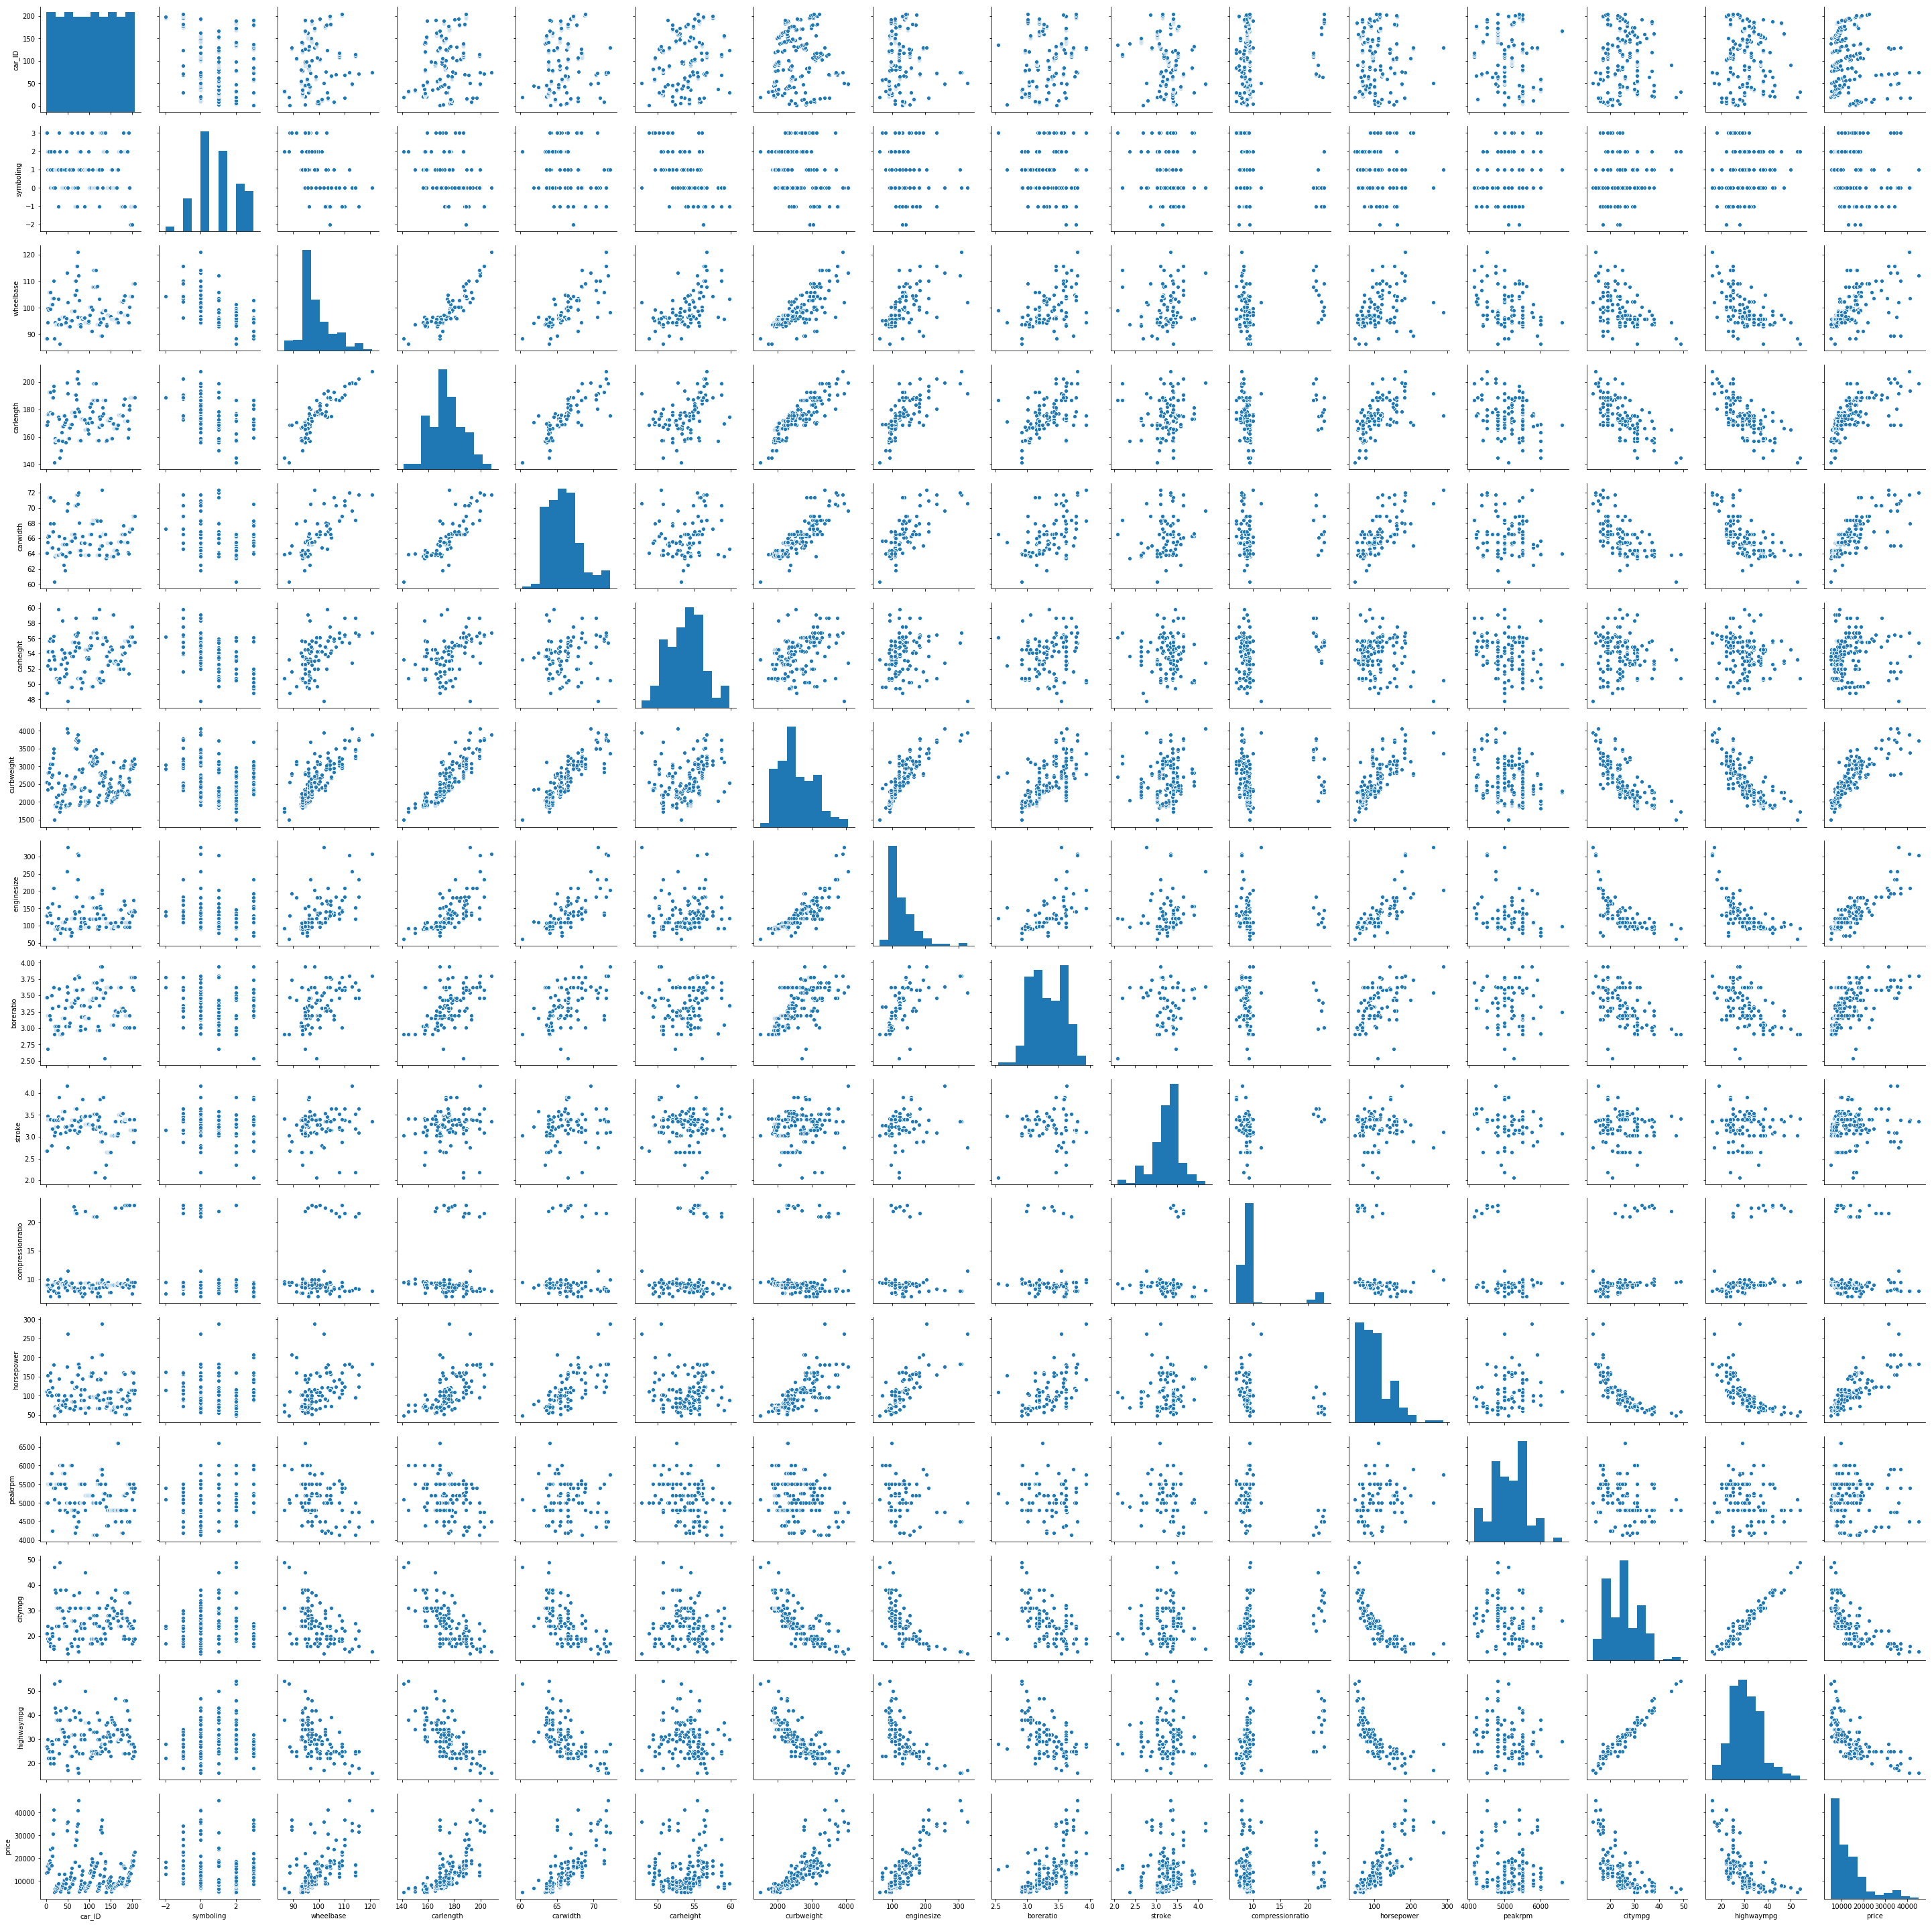

In [14]:
sns.pairplot(car_prices)
plt.show()

### Visualising Distributions of Numeric Variables against Categorical Variables

### Price

### Insights :
    - Diesel cars are priced higher on an average than gas cars.
    - Cars with a 'turbo' aspiration are, on an average, priced higher than cars with 'std' aspirations.
    - The more the number of cylinders in a car, the higher the price.
    - Hardtops and convertibles are costlier than hatchbacks, wagons and sedans.
    - Cars with 'rwd' drivewheel sell at a much more higher price than cars with 'fwd' and '4wd' drivewheels.
    - Number of doors have no significant effect on car price.
    - Engine types 'dohcv' and 'dohc' are costiler on an average.
    - Though on an average,fuelsystems do not seem to vary significantly in price, mpfi and idi seem to be costlier.
    - Cars with engines located at the rear are way more costlier than their front counterparts.
    - Buick, Jaguar and Porsche are the higher end cars, closely followed by BMW.

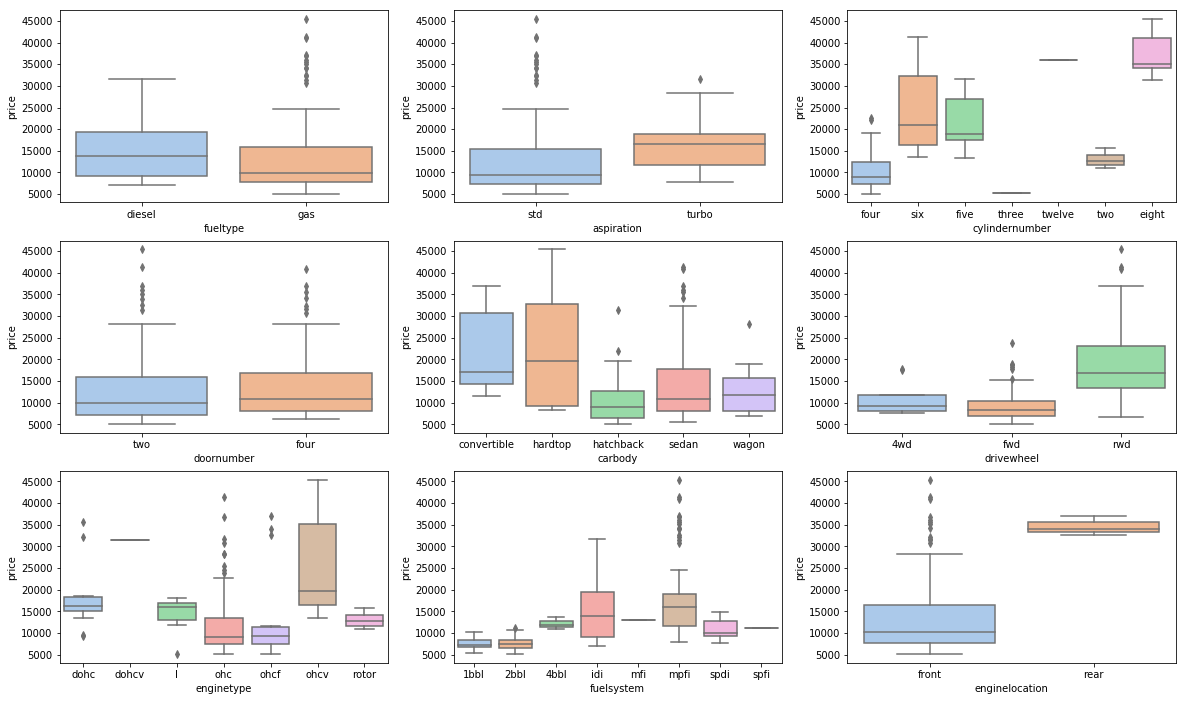

In [15]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = car_prices, palette='pastel')
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = car_prices, palette='pastel')
plt.subplot(3,3,3)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_prices, palette='pastel')
plt.subplot(3,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = car_prices, palette='pastel')
plt.subplot(3,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = car_prices, palette='pastel')
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_prices, palette='pastel')
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = car_prices, palette='pastel')
plt.subplot(3,3,8)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_prices, palette='pastel')
plt.subplot(3,3,9)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_prices, palette='pastel')
plt.show()

#### Price variations across car companies

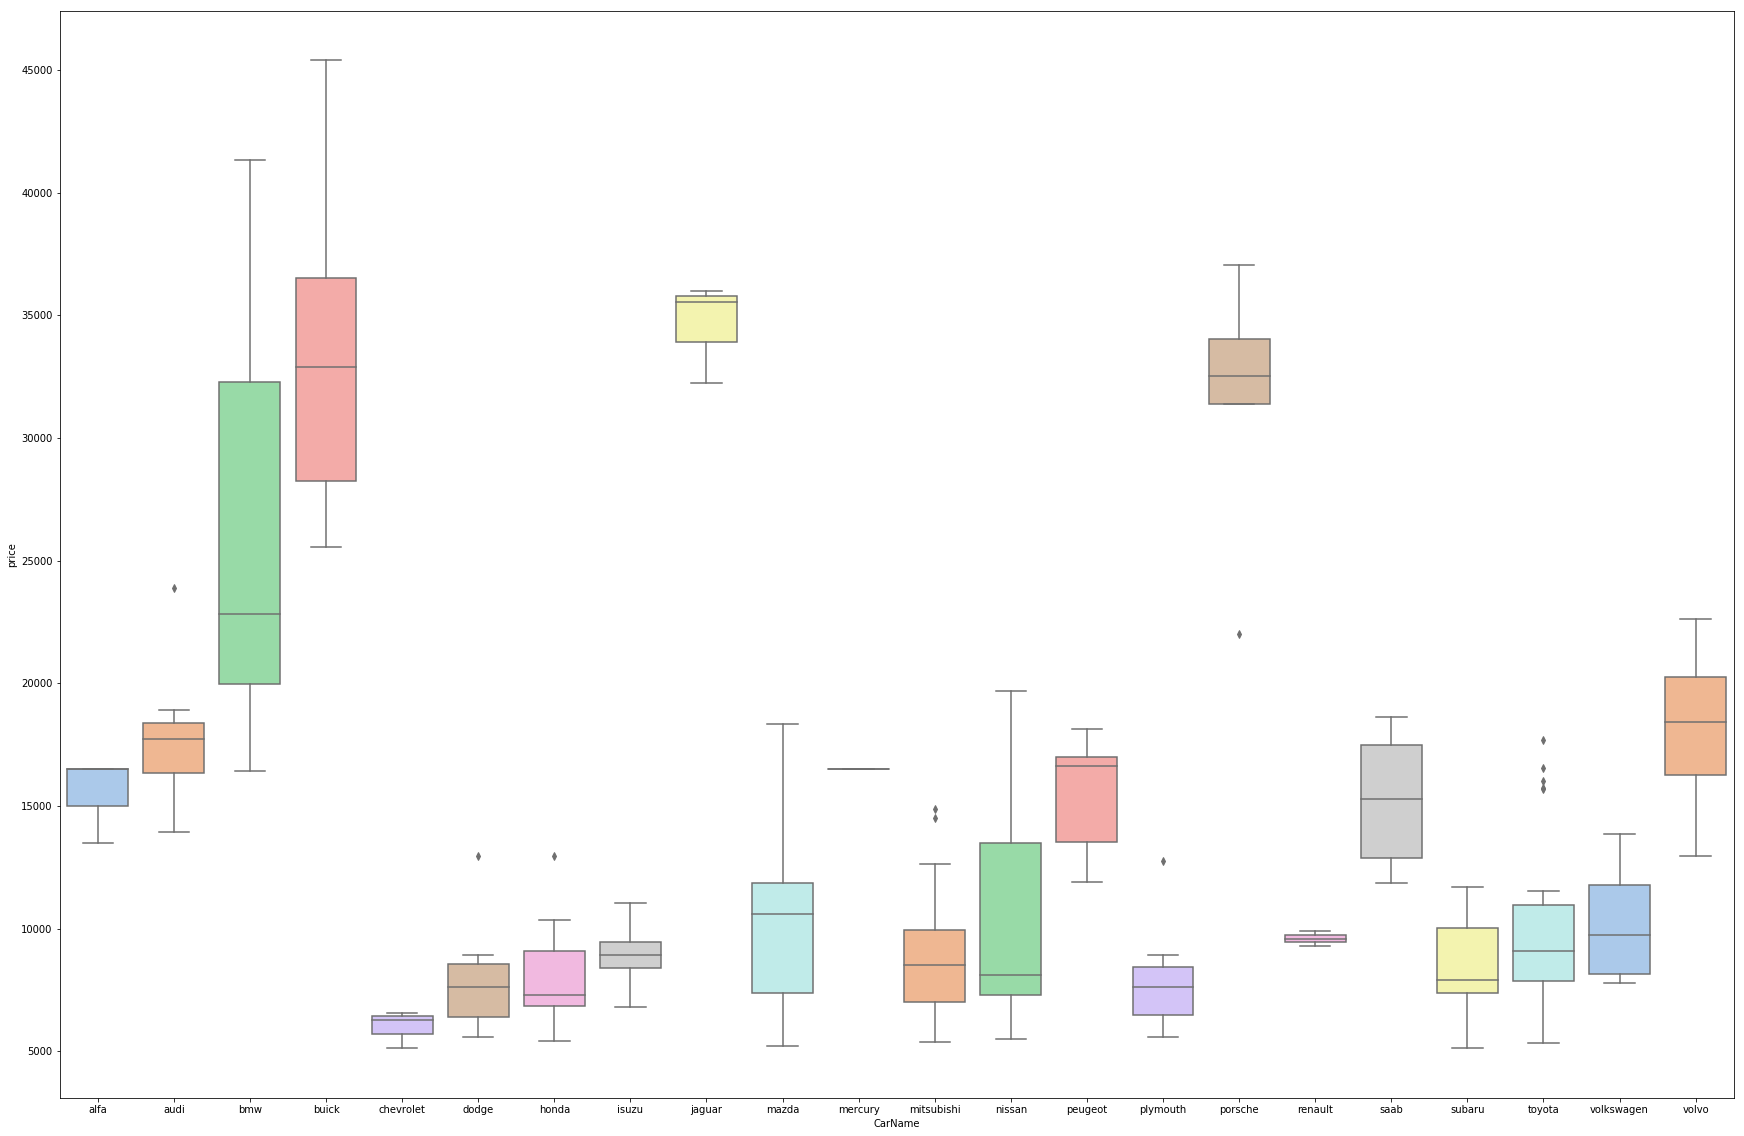

In [16]:
# Let's now see how price varies with the company name
plt.figure(figsize=(30, 20))
sns.boxplot(x = 'CarName', y = 'price', data = car_prices, palette='pastel');

### Horsepower

### Insights :
    - Gas based cars seem to generate more horsepower on an average than diesel cars.
    - Turbo charged engines generate more horsepower than standard engines.
    - The more the number of cylinders in a car, the higher the horsepower.
    - Hardtops and convertibles have more horsepower on an average than hatchbacks, wagons and sedans.
    - Cars with 'rwd' drivewheel have more horsepower than cars with 'fwd' and '4wd' drivewheels.
    - The maximum horsepower generated seems to be higher for two-doored cars.
    - Engine types 'dohcv', 'dohc' and 'ohcv' produce more horsepower than other engine types.
    - On an average,fuelsystems mpfi and spdi are associated with more horsepower.
    - Cars with engines located at the rear are are associated with more horsepower.

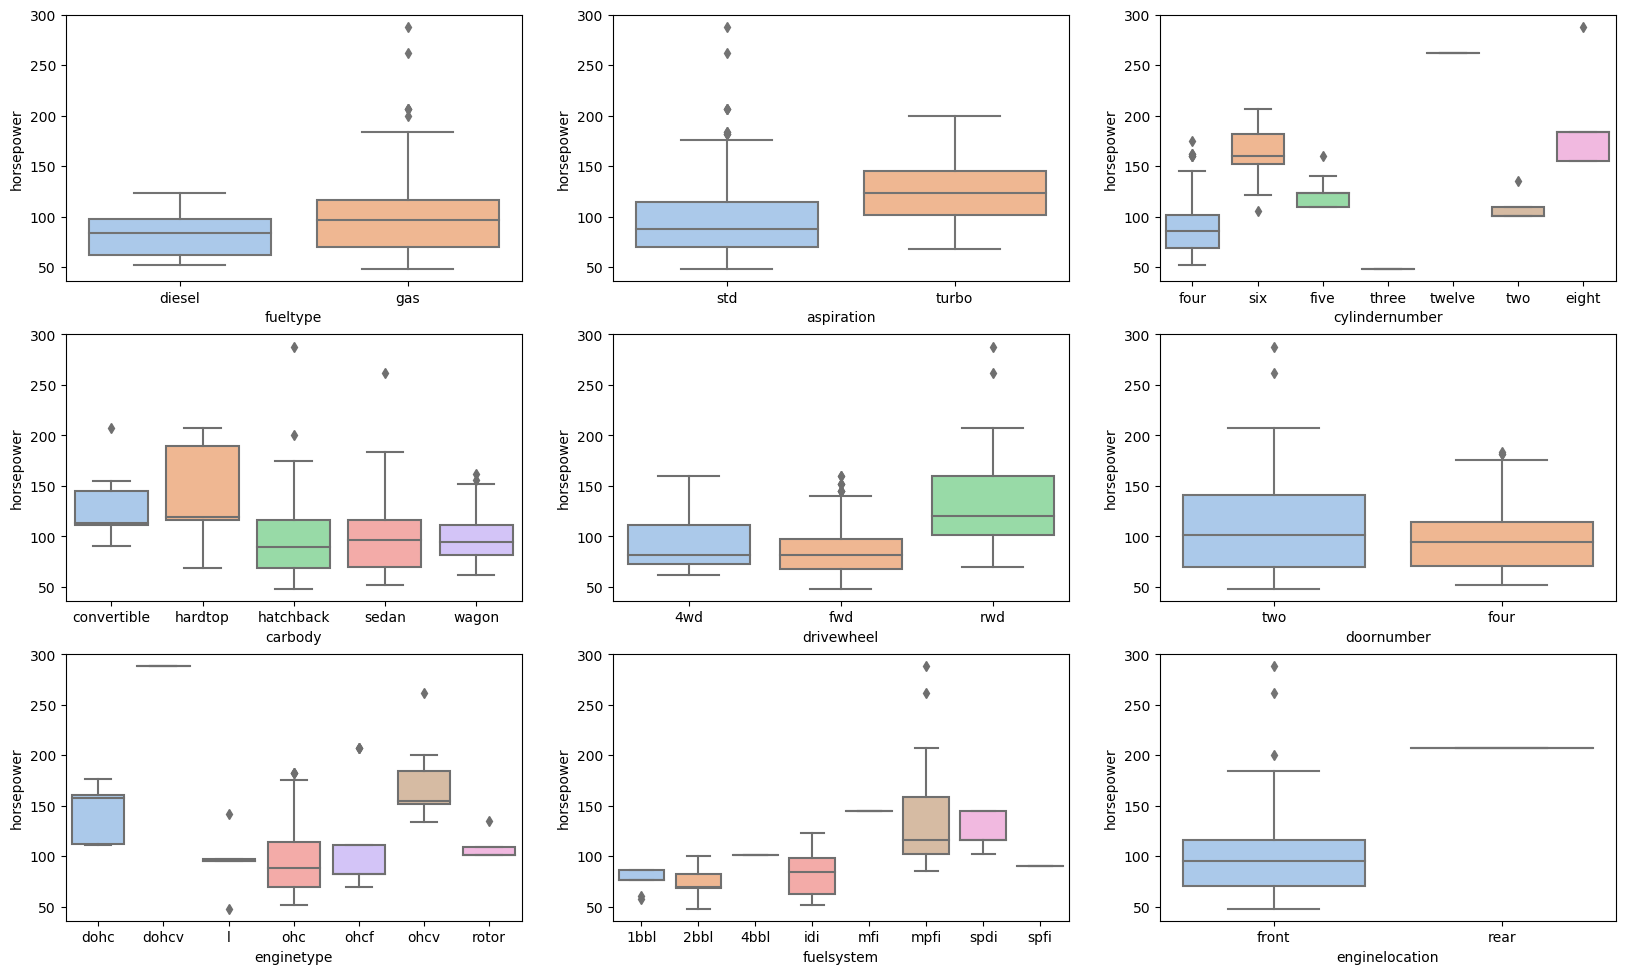

In [17]:
plt.figure(figsize=(20, 12), dpi=100)
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'horsepower', data = car_prices, palette='pastel');
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'horsepower', data = car_prices, palette='pastel');
plt.subplot(3,3,3)
sns.boxplot(x = 'cylindernumber', y = 'horsepower', data = car_prices, palette='pastel');
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'horsepower', data = car_prices, palette='pastel');
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'horsepower', data = car_prices, palette='pastel');
plt.subplot(3,3,6)
sns.boxplot(x = 'doornumber', y = 'horsepower', data = car_prices, palette='pastel');
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'horsepower', data = car_prices, palette='pastel');
plt.subplot(3,3,8)
sns.boxplot(x = 'fuelsystem', y = 'horsepower', data = car_prices, palette='pastel');
plt.subplot(3,3,9)
sns.boxplot(x = 'enginelocation', y = 'horsepower', data = car_prices, palette='pastel');

### Enginesize

### Insights :
    - Diesel cars seem to have larger enginesizes on an average than gas cars.
    - Turbo charged engines have greater enginesize than standard engines.
    - The more the number of cylinders in a car, the larger the enginesize.
    - Hardtops and convertibles seem to have larger enginesizes on an average than hatchbacks, wagons and sedans.
    - Cars with 'rwd' drivewheel have larger enginesizes than cars with 'fwd' and '4wd' drivewheels.
    - Number of doors have no significant effect on enginesize.
    - Engine types 'dohcv' and 'ohcv' require larger sized engines than other engine types.
    - On an average,fuelsystems mpfi,idi and spdi are associated with more enginesize.
    - Cars with engines located at the rear are are associated with more enginesize.

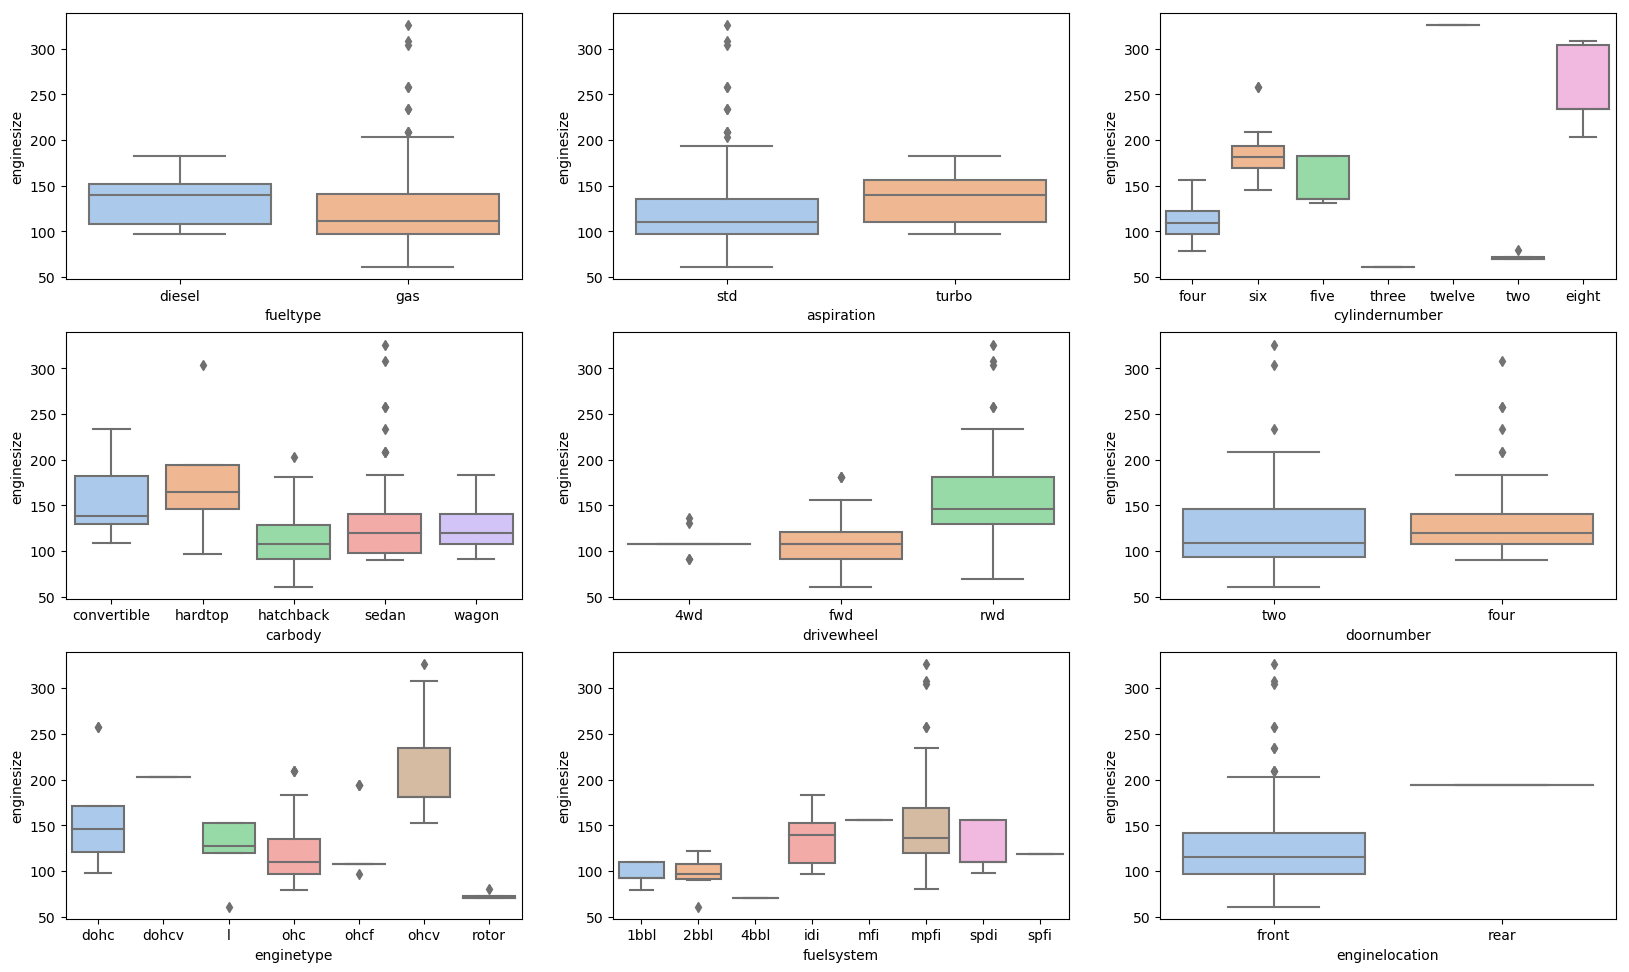

In [18]:
plt.figure(figsize=(20, 12), dpi=100)
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'enginesize', data = car_prices, palette='pastel');
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'enginesize', data = car_prices, palette='pastel');
plt.subplot(3,3,3)
sns.boxplot(x = 'cylindernumber', y = 'enginesize', data = car_prices, palette='pastel');
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'enginesize', data = car_prices, palette='pastel');
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'enginesize', data = car_prices, palette='pastel');
plt.subplot(3,3,6)
sns.boxplot(x = 'doornumber', y = 'enginesize', data = car_prices, palette='pastel');
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'enginesize', data = car_prices, palette='pastel');
plt.subplot(3,3,8)
sns.boxplot(x = 'fuelsystem', y = 'enginesize', data = car_prices, palette='pastel');
plt.subplot(3,3,9)
sns.boxplot(x = 'enginelocation', y = 'enginesize', data = car_prices, palette='pastel');

### Curbweight

### Insights :
    - Diesel cars seem to have higher curweights on an average than gas cars.
    - Turbo charged engines have higher curweights than standard engines.
    - The more the number of cylinders in a car, the higher the curweight.
    - The curbweigth does not vary significantly on an average for different types of car bodies, though hatchbacks are associated with the lowest curbweights.
    - Cars with 'rwd' drivewheel have higher curweights than cars with 'fwd' and '4wd' drivewheels.
    - Four-doored cars have higher curbweight than two-doored cars.
    - Engine types 'dohcv','l' and 'ohcv' require higher curbweights than other engine types.
    - On an average,fuelsystems mpfi and idi are associated with more curbweights.
    - Cars with engines located at the rear are associated with more curbweights.

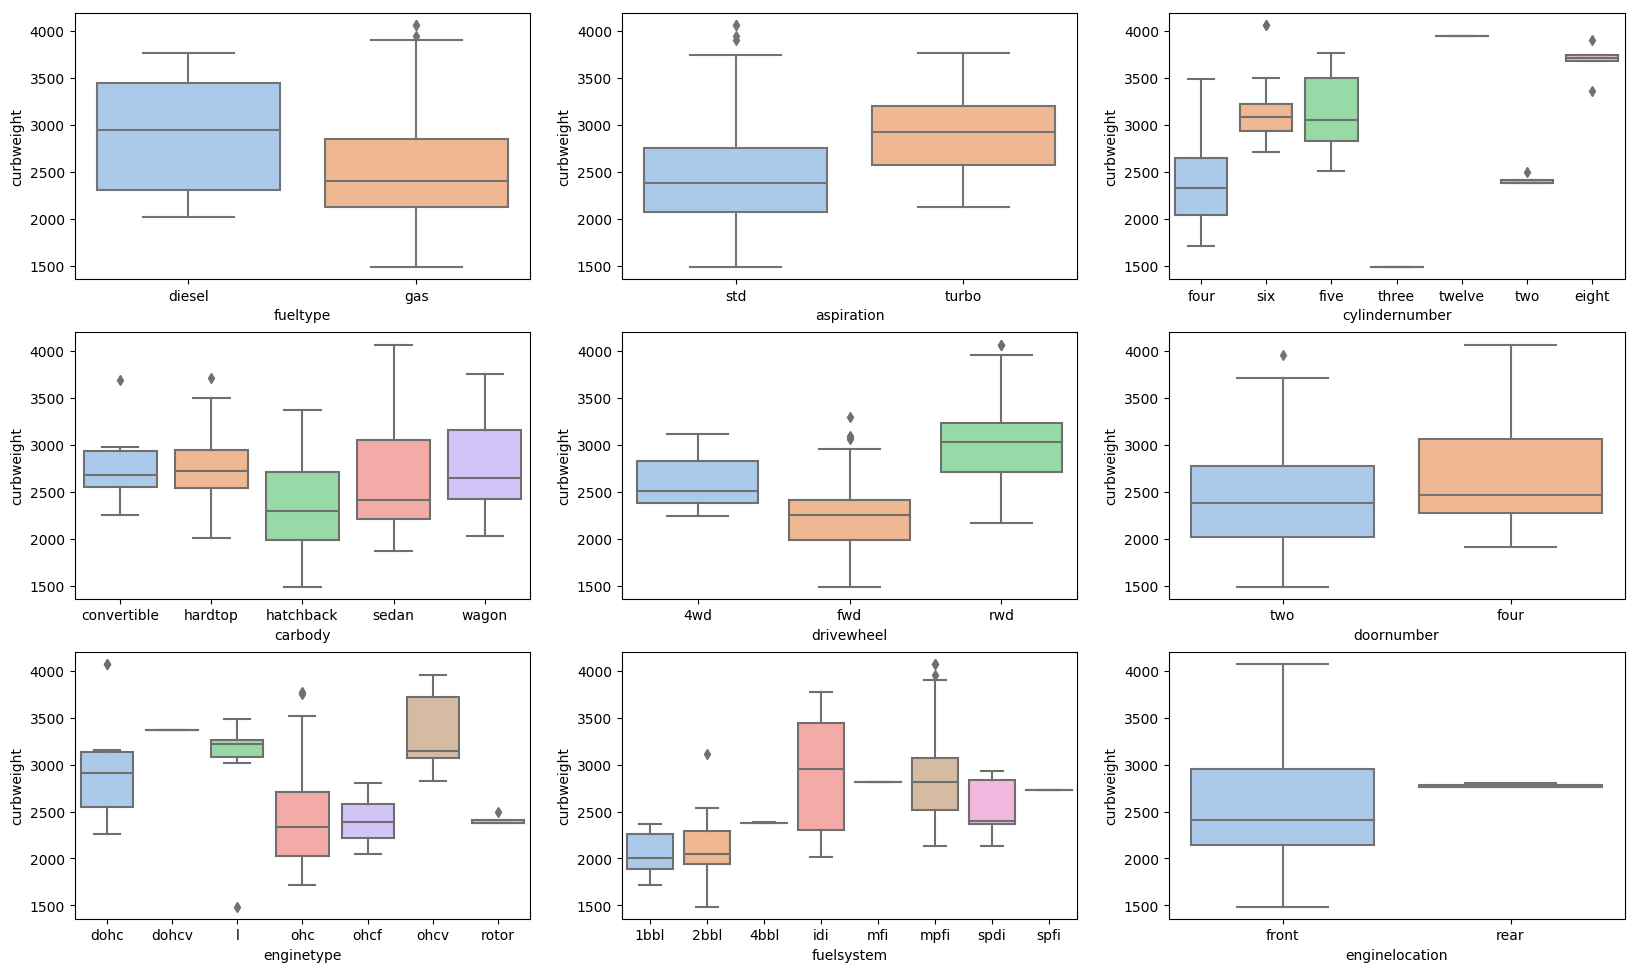

In [19]:
plt.figure(figsize=(20, 12), dpi=100)
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'curbweight', data = car_prices, palette='pastel');
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'curbweight', data = car_prices, palette='pastel');
plt.subplot(3,3,3)
sns.boxplot(x = 'cylindernumber', y = 'curbweight', data = car_prices, palette='pastel');
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'curbweight', data = car_prices, palette='pastel');
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'curbweight', data = car_prices, palette='pastel');
plt.subplot(3,3,6)
sns.boxplot(x = 'doornumber', y = 'curbweight', data = car_prices, palette='pastel');
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'curbweight', data = car_prices, palette='pastel');
plt.subplot(3,3,8)
sns.boxplot(x = 'fuelsystem', y = 'curbweight', data = car_prices, palette='pastel');
plt.subplot(3,3,9)
sns.boxplot(x = 'enginelocation', y = 'curbweight', data = car_prices, palette='pastel');

### Carlength

### Insights :
    - Diesel cars seem to have higher carlengths on an average than gas cars.
    - Turbo charged engines have higher carlengths than standard engines.
    - The number of cylinders in a car doesn't seem to have a significant influence on carlengths.
    - Sedans, on an average have higher carlengths than other types of car bodies.
    - Cars with 'rwd' drivewheel have higher carlengths than cars with 'fwd' and '4wd' drivewheels.
    - Four-doored cars have higher carlengths than two-doored cars.
    - Engine types 'dohc','ohcv'and 'l' have higher carlengths, on an average than other engine types.
    - On an average,fuelsystems mpfi and idi are associated with more carlengths.
    - Engine location doesn't seem to have any significant effect on carlengths.

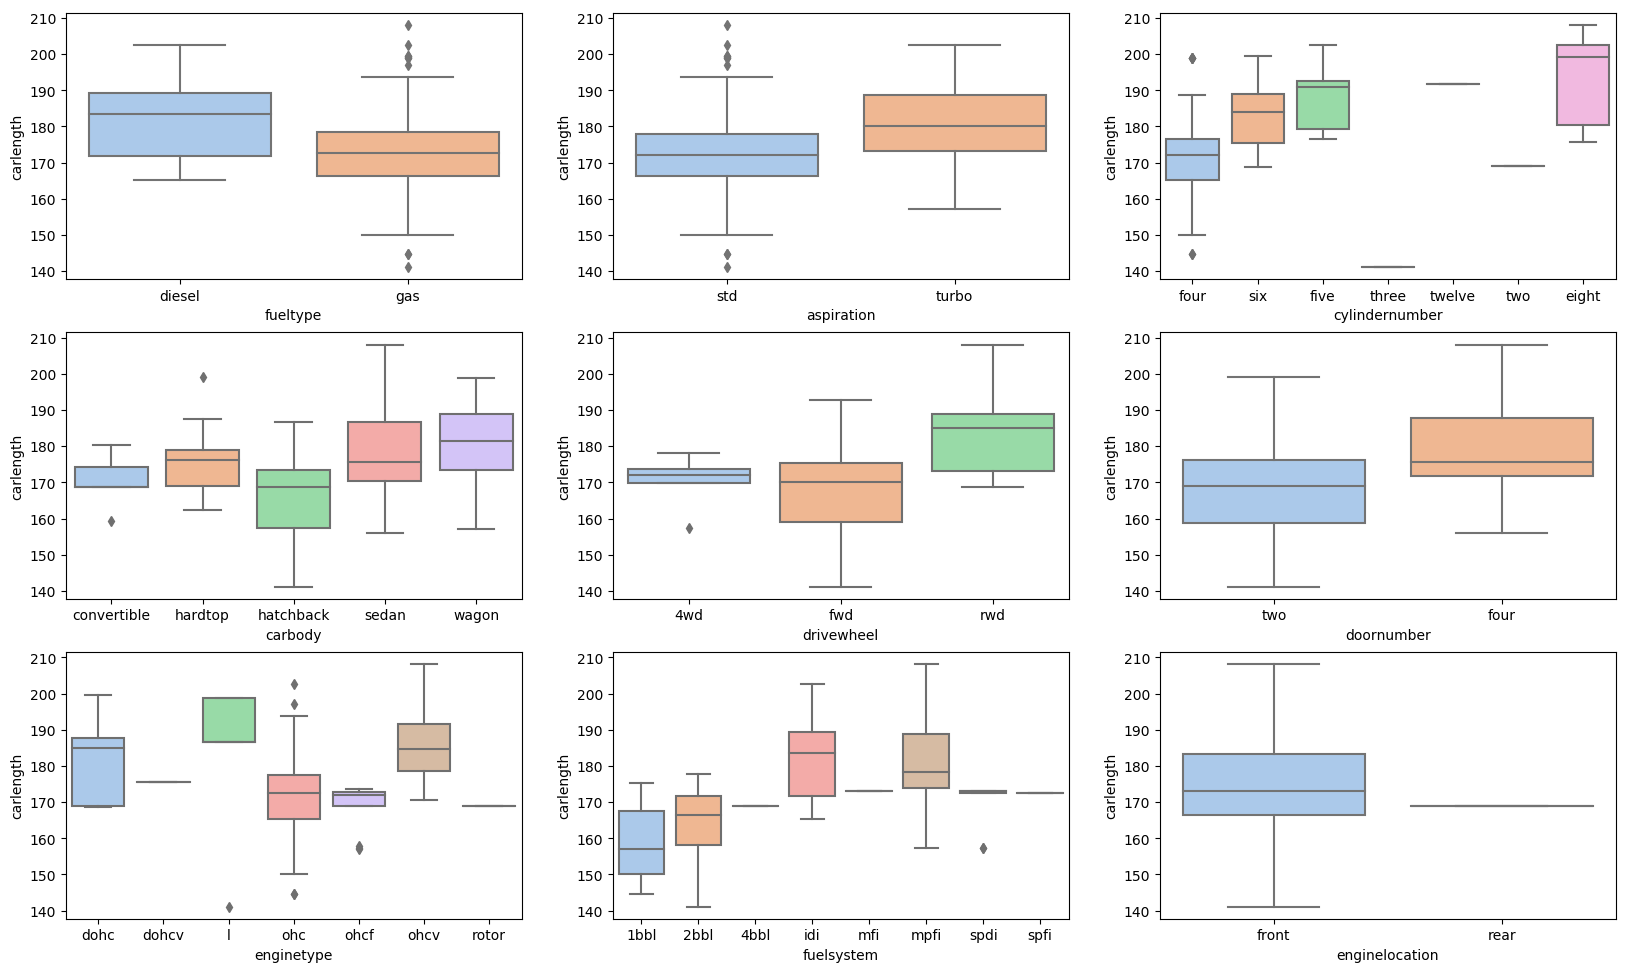

In [20]:
plt.figure(figsize=(20, 12), dpi=100)
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'carlength', data = car_prices, palette='pastel');
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'carlength', data = car_prices, palette='pastel');
plt.subplot(3,3,3)
sns.boxplot(x = 'cylindernumber', y = 'carlength', data = car_prices, palette='pastel');
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'carlength', data = car_prices, palette='pastel');
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'carlength', data = car_prices, palette='pastel');
plt.subplot(3,3,6)
sns.boxplot(x = 'doornumber', y = 'carlength', data = car_prices, palette='pastel');
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'carlength', data = car_prices, palette='pastel');
plt.subplot(3,3,8)
sns.boxplot(x = 'fuelsystem', y = 'carlength', data = car_prices, palette='pastel');
plt.subplot(3,3,9)
sns.boxplot(x = 'enginelocation', y = 'carlength', data = car_prices, palette='pastel');

### Carwidth

### Insights :
    - Diesel cars seem to have higher carwidths on an average than gas cars.
    - Turbo charged engines have higher carwidths than standard engines.
    - The higher the number of cylinders in a car, the greater the car width.
    - Different types of car bodies do not have a significant influence on carwidths.
    - Cars with 'rwd' drivewheel have higher carwidths than cars with 'fwd' and '4wd' drivewheels.
    - Number of car doors do not significantly influence car widths.
    - Engine types 'dohcv' and 'ohcv' have higher carwidths, on an average than other engine types.
    - On an average,fuelsystems mpfi and idi are associated with more carwidths.
    - Engine location doesn't seem to have any significant effect on carwidths.

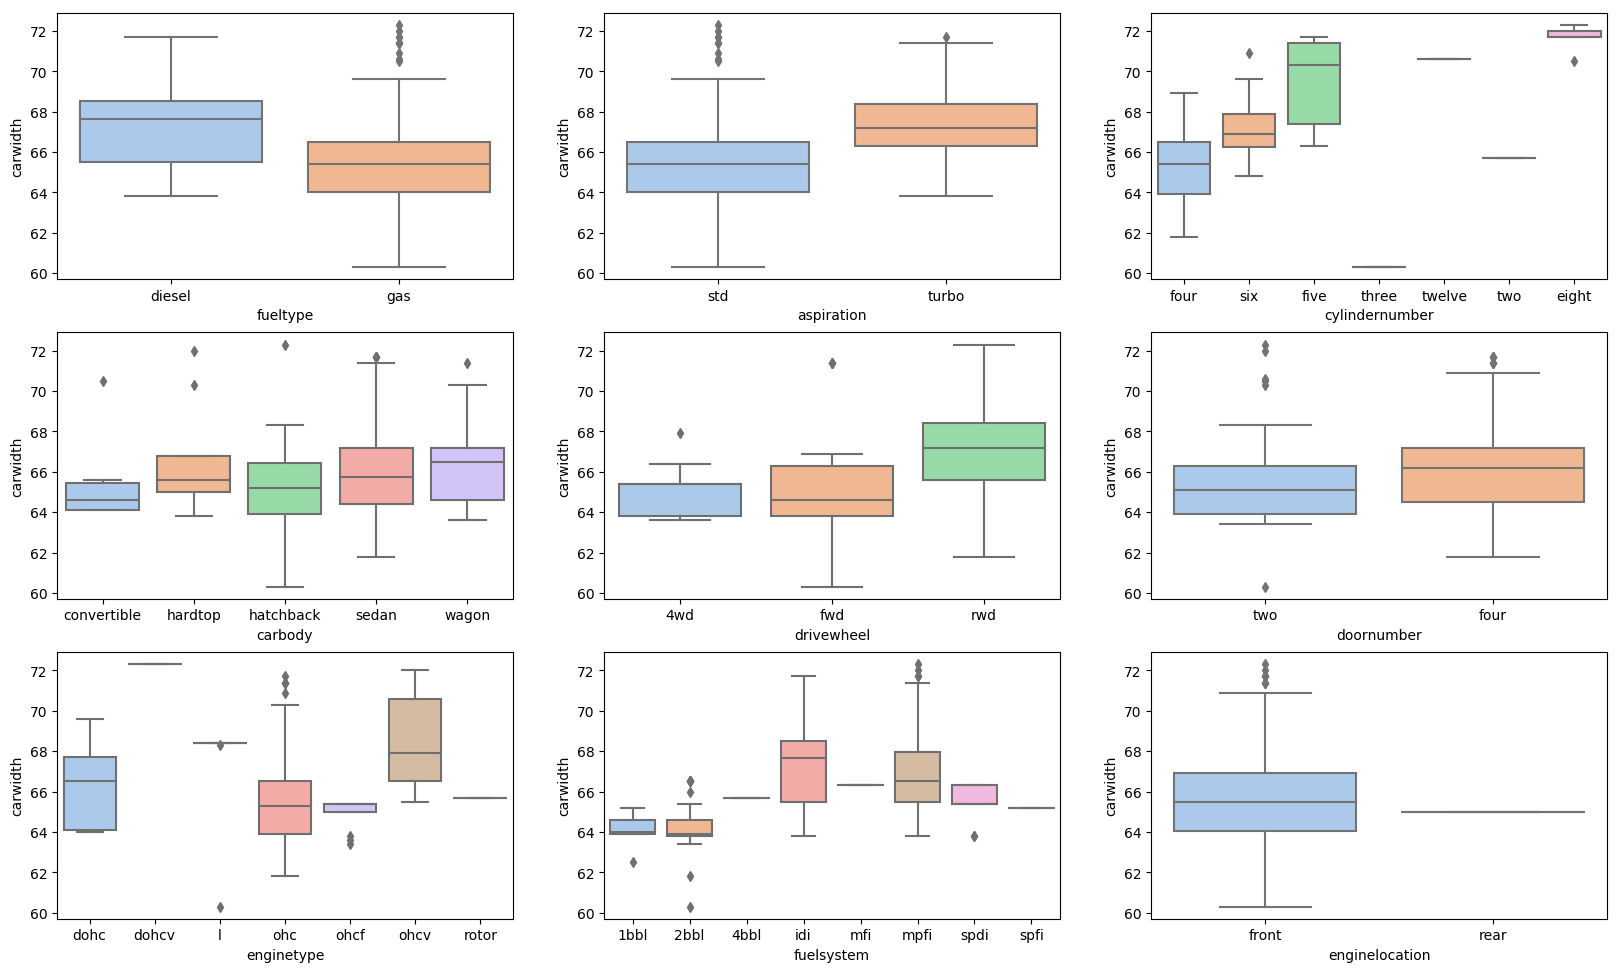

In [21]:
plt.figure(figsize=(20, 12), dpi=100)
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'carwidth', data = car_prices, palette='pastel');
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'carwidth', data = car_prices, palette='pastel');
plt.subplot(3,3,3)
sns.boxplot(x = 'cylindernumber', y = 'carwidth', data = car_prices, palette='pastel');
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'carwidth', data = car_prices, palette='pastel');
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'carwidth', data = car_prices, palette='pastel');
plt.subplot(3,3,6)
sns.boxplot(x = 'doornumber', y = 'carwidth', data = car_prices, palette='pastel');
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'carwidth', data = car_prices, palette='pastel');
plt.subplot(3,3,8)
sns.boxplot(x = 'fuelsystem', y = 'carwidth', data = car_prices, palette='pastel');
plt.subplot(3,3,9)
sns.boxplot(x = 'enginelocation', y = 'carwidth', data = car_prices, palette='pastel');

### Carheight

### Insights :
    - Diesel cars seem to have higher carheights on an average than gas cars.
    - Turbo charged engines have higher carheights than standard engines on an average.
    - 5 and 8 cylinders in a car seem to have a higher influence on carwidths.
    - Wagons and sedans have higher carwidths than other types of cars.
    - 4wd drivewheels are associated with higher carheights.
    - Four-doored cars, on an average have higher carheights than two-doored cars.
    - Engine types 'l' and 'ohcv' have higher carheights, on an average than other engine types.
    - On an average,fuelsystems idi and mpfi are associated with more carheights.
    - Cars with engines on the front have higher carheights.

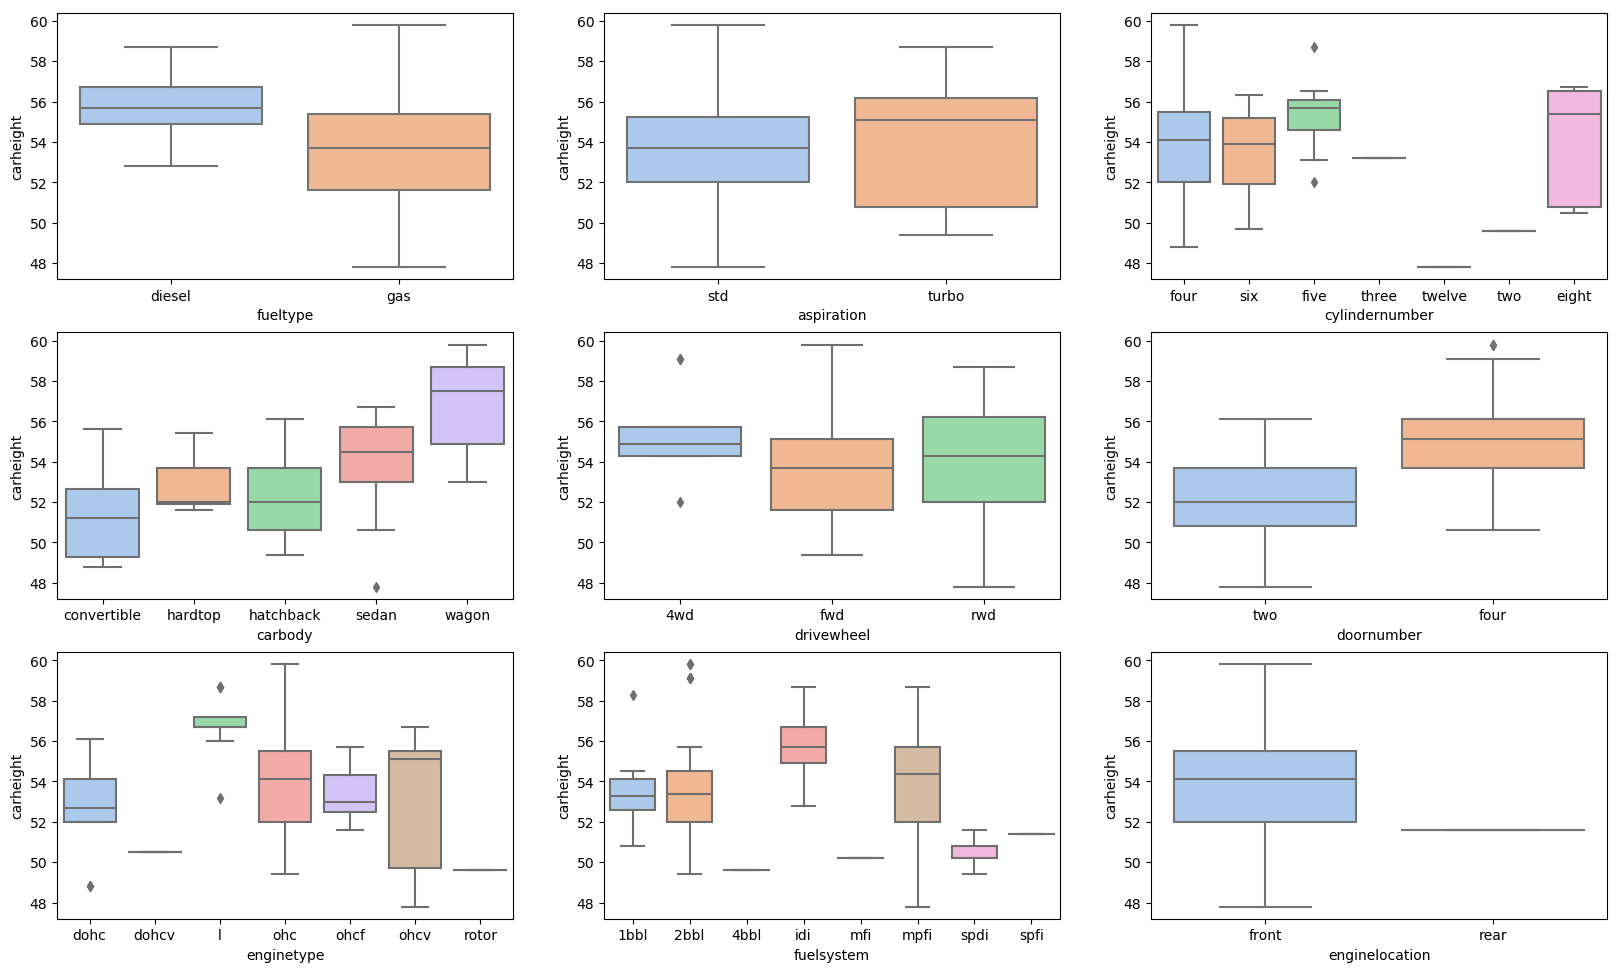

In [22]:
plt.figure(figsize=(20, 12), dpi=100)
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'carheight', data = car_prices, palette='pastel');
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'carheight', data = car_prices, palette='pastel');
plt.subplot(3,3,3)
sns.boxplot(x = 'cylindernumber', y = 'carheight', data = car_prices, palette='pastel');
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'carheight', data = car_prices, palette='pastel');
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'carheight', data = car_prices, palette='pastel');
plt.subplot(3,3,6)
sns.boxplot(x = 'doornumber', y = 'carheight', data = car_prices, palette='pastel');
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'carheight', data = car_prices, palette='pastel');
plt.subplot(3,3,8)
sns.boxplot(x = 'fuelsystem', y = 'carheight', data = car_prices, palette='pastel');
plt.subplot(3,3,9)
sns.boxplot(x = 'enginelocation', y = 'carheight', data = car_prices, palette='pastel');

### Wheelbase

### Insights :
    - Diesel cars seem to have higher wheelbase on an average than gas cars.
    - Turbo charged engines have higher wheelbase than standard engines on an average.
    - 5 and 8 cylinders in a car seem to have a higher positive influence on wheelbase.
    - Wagons,hardtops and sedans have higher wheelbase than other types of cars.
    - Cars with 'rwd' drivewheel have higher wheelbase than cars with 'fwd' and '4wd' drivewheels.
    - Four-doored cars, on an average have higher wheelbase than two-doored cars.
    - Engine types 'l' and 'ohcv' have higher wheelbase, on an average than other engine types.
    - On an average,fuelsystems idi and mpfi are associated with more wheelbase.
    - Cars with engines on the front have higher wheelbase.

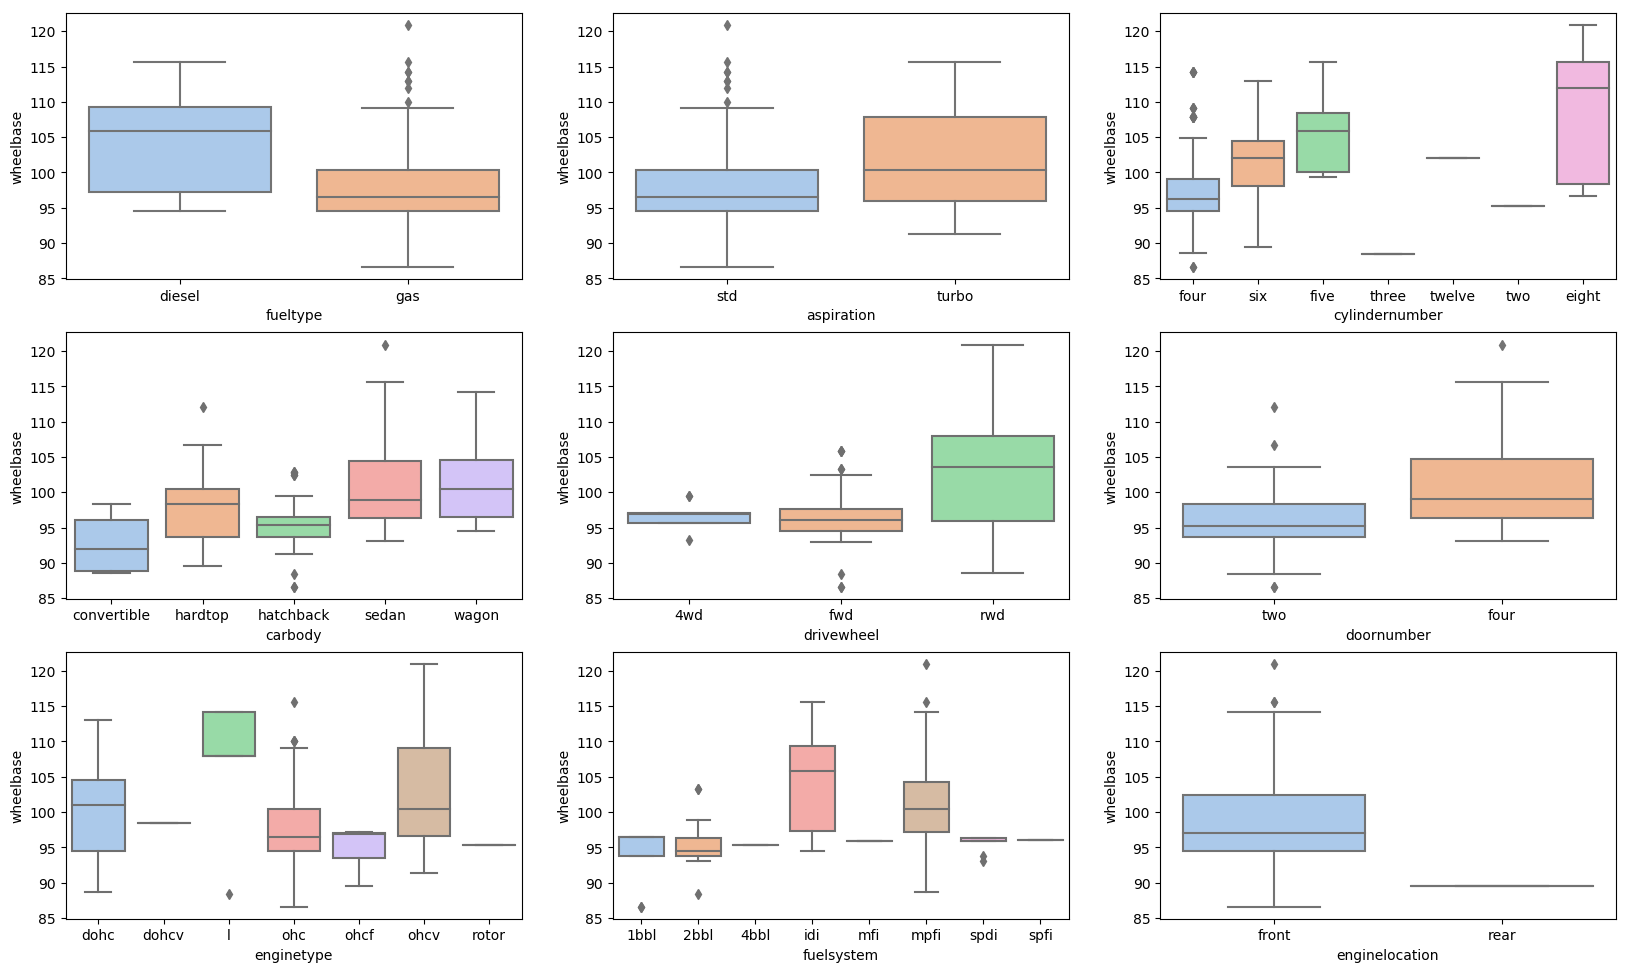

In [23]:
plt.figure(figsize=(20, 12), dpi=100)
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'wheelbase', data = car_prices, palette='pastel');
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'wheelbase', data = car_prices, palette='pastel');
plt.subplot(3,3,3)
sns.boxplot(x = 'cylindernumber', y = 'wheelbase', data = car_prices, palette='pastel');
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'wheelbase', data = car_prices, palette='pastel');
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'wheelbase', data = car_prices, palette='pastel');
plt.subplot(3,3,6)
sns.boxplot(x = 'doornumber', y = 'wheelbase', data = car_prices, palette='pastel');
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'wheelbase', data = car_prices, palette='pastel');
plt.subplot(3,3,8)
sns.boxplot(x = 'fuelsystem', y = 'wheelbase', data = car_prices, palette='pastel');
plt.subplot(3,3,9)
sns.boxplot(x = 'enginelocation', y = 'wheelbase', data = car_prices, palette='pastel');

### Derived Features

#### Power-to-Weight ratio 

Let's calculate the power-to-weight ratio (horsepower/curbweight), which is represented as horsepower to 10 pounds. The higher the number, the better a car is going to be in terms of performance

In [24]:
car_prices['pw_ratio'] = (car_prices['horsepower']/car_prices['curbweight'])*10
car_prices.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,pw_ratio
0,1,3,alfa,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0.435636
1,2,3,alfa,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0.435636
2,3,1,alfa,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0.545519
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0.436457
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0.407224


#### Wheelbase-to-Carlength ratio 

Another thing to consider is what proportion of the car's length falls between the front and back wheels. In general, a car with a longer wheelbase compared to its overall length will make better use of the cabin space and feel more stable on the road. We can get this value by dividing wheelbase by carlength

In [25]:
car_prices['wc_ratio'] = (car_prices['wheelbase']/car_prices['carlength'])
car_prices.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,pw_ratio,wc_ratio
0,1,3,alfa,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,0.435636,0.524882
1,2,3,alfa,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,0.435636,0.524882
2,3,1,alfa,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,0.545519,0.551986
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,0.436457,0.565119
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,0.407224,0.562854


### Visualize the effect of the derived variables on price

### Insights:
    - Higher the power-weight ratio, higher is the price of the car on an average.
    - Lower the wheelbase-carlength ratio, higher is the price of the car on an average(maybe because high wc_ratio implies low carlength)

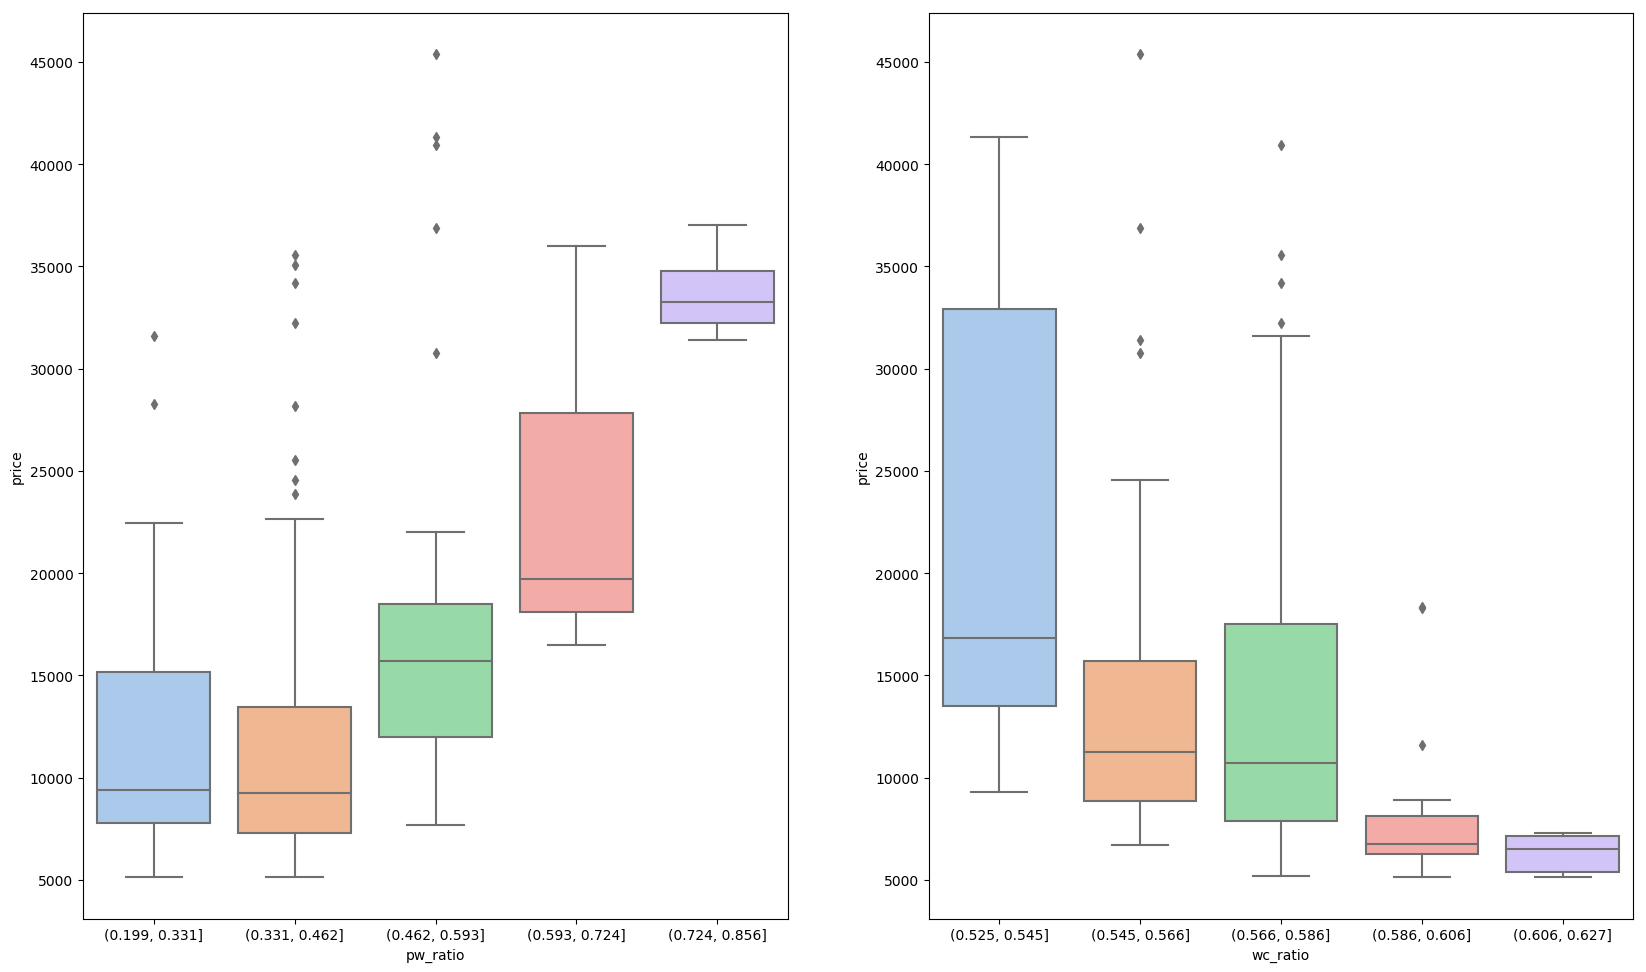

In [26]:
plt.figure(figsize=(20, 12), dpi=100)
plt.subplot(1,2,1)
sns.boxplot(x = pd.cut(car_prices['pw_ratio'], 5), y = 'price', data = car_prices, palette='pastel');
plt.subplot(1,2,2)
sns.boxplot(x = pd.cut(car_prices['wc_ratio'], 5), y = 'price', data = car_prices, palette='pastel');

## Step 3: Data Preparation

    - Convert 'fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem' to dummies.
    - Convert 'doornumber','cylindernumber' to numeric values based off their string values 
   

#### Dummify fueltype variable

In [27]:
# Get the dummy variables for the feature 'fueltype' and store it in a new variable - 'fueltype_dummies'
fueltype_dummies = pd.get_dummies(car_prices['fueltype'])

In [28]:
# Check what the dataset 'fueltype_dummies' looks like
fueltype_dummies.head(10)

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [29]:
# Let's drop the first column (diesel) from fueltype_dummies df using 'drop_first = True'
fueltype_dummies = pd.get_dummies(car_prices['fueltype'], drop_first = True)
fueltype_dummies.head(10)

,gas
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [30]:
# Add the results to the original car_prices dataframe
car_prices = pd.concat([car_prices, fueltype_dummies], axis = 1)
car_prices.head(20)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,pw_ratio,wc_ratio,gas
0,1,3,alfa,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.000,0.435636,0.524882,1
1,2,3,alfa,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.000,0.435636,0.524882,1
2,3,1,alfa,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.000,0.545519,0.551986,1
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.000,0.436457,0.565119,1
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.000,0.407224,0.562854,1
5,6,2,audi,gas,std,two,sedan,fwd,front,99.8,...,3.40,8.5,110,5500,19,25,15250.000,0.438771,0.562888,1
6,7,1,audi,gas,std,four,sedan,fwd,front,105.8,...,3.40,8.5,110,5500,19,25,17710.000,0.386779,0.549040,1
7,8,1,audi,gas,std,four,wagon,fwd,front,105.8,...,3.40,8.5,110,5500,19,25,18920.000,0.372376,0.549040,1
8,9,1,audi,gas,turbo,four,sedan,fwd,front,105.8,...,3.40,8.3,140,5500,17,20,23875.000,0.453662,0.549040,1
9,10,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,3.40,7.0,160,5500,16,22,17859.167,0.524075,0.558361,1


In [31]:
# Let's drop 'fueltype' as we have created the dummies for it
car_prices.drop(['fueltype'], axis = 1, inplace = True)

In [32]:
car_prices.head(10)

,car_ID,symboling,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,pw_ratio,wc_ratio,gas
0,1,3,alfa,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,13495.000,0.435636,0.524882,1
1,2,3,alfa,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,16500.000,0.435636,0.524882,1
2,3,1,alfa,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000,19,26,16500.000,0.545519,0.551986,1
3,4,2,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102,5500,24,30,13950.000,0.436457,0.565119,1
4,5,2,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115,5500,18,22,17450.000,0.407224,0.562854,1
5,6,2,audi,std,two,sedan,fwd,front,99.8,177.3,...,3.40,8.5,110,5500,19,25,15250.000,0.438771,0.562888,1
6,7,1,audi,std,four,sedan,fwd,front,105.8,192.7,...,3.40,8.5,110,5500,19,25,17710.000,0.386779,0.549040,1
7,8,1,audi,std,four,wagon,fwd,front,105.8,192.7,...,3.40,8.5,110,5500,19,25,18920.000,0.372376,0.549040,1
8,9,1,audi,turbo,four,sedan,fwd,front,105.8,192.7,...,3.40,8.3,140,5500,17,20,23875.000,0.453662,0.549040,1
9,10,0,audi,turbo,two,hatchback,4wd,front,99.5,178.2,...,3.40,7.0,160,5500,16,22,17859.167,0.524075,0.558361,1


 Now, let's follow the same process for 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem' features

#### Dummify 'aspiration' feature

In [33]:
aspiration_dummies = pd.get_dummies(car_prices['aspiration'], drop_first = True)
aspiration_dummies.head(10)

,turbo
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,1


#### Dummify 'carbody' feature

In [34]:
carbody_dummies = pd.get_dummies(car_prices['carbody'], drop_first = True)
carbody_dummies.head(10)

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
5,0,0,1,0
6,0,0,1,0
7,0,0,0,1
8,0,0,1,0
9,0,1,0,0


#### Dummify 'drivewheel' feature

In [35]:
drivewheel_dummies = pd.get_dummies(car_prices['drivewheel'], drop_first = True)
drivewheel_dummies.head(10)

,fwd,rwd
0,0,1
1,0,1
2,0,1
3,1,0
4,0,0
5,1,0
6,1,0
7,1,0
8,1,0
9,0,0


#### Dummify 'enginelocation' feature

In [36]:
enginelocation_dummies = pd.get_dummies(car_prices['enginelocation'], drop_first = True)
enginelocation_dummies.head(10)

,rear
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


#### Dummify 'enginetype' feature

In [37]:
enginetype_dummies = pd.get_dummies(car_prices['enginetype'], drop_first = True)
enginetype_dummies.head()

,dohcv,l,ohc,ohcf,ohcv,rotor
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


#### Dummify 'fuelsystem' feature

In [38]:
fuelsystem_dummies = pd.get_dummies(car_prices['fuelsystem'], drop_first = True)
fuelsystem_dummies.head()

,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


#### Dummify 'CarName' feature

In [39]:
carname_dummies = pd.get_dummies(car_prices['CarName'], drop_first = True)
carname_dummies.head(10)

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Add the results to the original car_prices dataframe
car_prices = pd.concat([car_prices, aspiration_dummies, carbody_dummies, drivewheel_dummies, enginelocation_dummies, enginetype_dummies, fuelsystem_dummies,carname_dummies], axis = 1)
car_prices.head(10)

,car_ID,symboling,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,3,alfa,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
1,2,3,alfa,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
2,3,1,alfa,std,two,hatchback,rwd,front,94.5,171.2,...,0,0,0,0,0,0,0,0,0,0
3,4,2,audi,std,four,sedan,fwd,front,99.8,176.6,...,0,0,0,0,0,0,0,0,0,0
4,5,2,audi,std,four,sedan,4wd,front,99.4,176.6,...,0,0,0,0,0,0,0,0,0,0
5,6,2,audi,std,two,sedan,fwd,front,99.8,177.3,...,0,0,0,0,0,0,0,0,0,0
6,7,1,audi,std,four,sedan,fwd,front,105.8,192.7,...,0,0,0,0,0,0,0,0,0,0
7,8,1,audi,std,four,wagon,fwd,front,105.8,192.7,...,0,0,0,0,0,0,0,0,0,0
8,9,1,audi,turbo,four,sedan,fwd,front,105.8,192.7,...,0,0,0,0,0,0,0,0,0,0
9,10,0,audi,turbo,two,hatchback,4wd,front,99.5,178.2,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Let's drop 'aspiration','carbody','drivewheel','enginelocation','enginetype'
# features as we have created the dummies for it
car_prices.drop(['CarName','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem'], axis = 1, inplace = True)
car_prices.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,3,two,88.6,168.8,64.1,48.8,2548,four,130,...,0,0,0,0,0,0,0,0,0,0
1,2,3,two,88.6,168.8,64.1,48.8,2548,four,130,...,0,0,0,0,0,0,0,0,0,0
2,3,1,two,94.5,171.2,65.5,52.4,2823,six,152,...,0,0,0,0,0,0,0,0,0,0
3,4,2,four,99.8,176.6,66.2,54.3,2337,four,109,...,0,0,0,0,0,0,0,0,0,0
4,5,2,four,99.4,176.6,66.4,54.3,2824,five,136,...,0,0,0,0,0,0,0,0,0,0


In [42]:
car_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 63 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
doornumber          205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
cylindernumber      205 non-null object
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
pw_ratio            205 non-null float64
wc_ratio            205 non-null float64
gas                 205 non-null uint8
turbo               205 non-null uint8
hardtop        

#### Convert 'doornumber', 'cylindernumber' to numeric values based off their string values

In [43]:
car_prices['doornumber'] = car_prices['doornumber'].map({'two': 2, "four": 4}).astype('int64')
car_prices['cylindernumber'] = car_prices['cylindernumber'].map({'two': 2,"three":3,"four": 4,"five": 5,"six": 6, "eight": 8,"twelve": 12}).astype('int64')
car_prices.head(10)


,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,0,0,0
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,0,0,0
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,...,0,0,0,0,0,0,0,0,0,0
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,...,0,0,0,0,0,0,0,0,0,0
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,...,0,0,0,0,0,0,0,0,0,0
5,6,2,2,99.8,177.3,66.3,53.1,2507,5,136,...,0,0,0,0,0,0,0,0,0,0
6,7,1,4,105.8,192.7,71.4,55.7,2844,5,136,...,0,0,0,0,0,0,0,0,0,0
7,8,1,4,105.8,192.7,71.4,55.7,2954,5,136,...,0,0,0,0,0,0,0,0,0,0
8,9,1,4,105.8,192.7,71.4,55.9,3086,5,131,...,0,0,0,0,0,0,0,0,0,0
9,10,0,2,99.5,178.2,67.9,52.0,3053,5,131,...,0,0,0,0,0,0,0,0,0,0


In [44]:
car_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 63 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
doornumber          205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
cylindernumber      205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
pw_ratio            205 non-null float64
wc_ratio            205 non-null float64
gas                 205 non-null uint8
turbo               205 non-null uint8
hardtop          

In [45]:
#Let's drop the car_ID feature from the dataframe as it doesn't add any value to our analysis
car_prices.drop(['car_ID'], axis = 1, inplace = True)
car_prices.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [46]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(car_prices, train_size = 0.7, test_size = 0.3, random_state = 100)

In [47]:
#Let's take a look at our training set
df_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,1,4,93.7,167.3,63.8,50.8,2191,4,98,2.97,...,0,0,1,0,0,0,0,0,0,0
125,3,2,94.5,168.9,68.3,50.2,2778,4,151,3.94,...,0,0,0,1,0,0,0,0,0,0
166,1,2,94.5,168.7,64.0,52.6,2300,4,98,3.24,...,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
199,-1,4,104.3,188.8,67.2,57.5,3157,4,130,3.62,...,0,0,0,0,0,0,0,0,0,1


In [48]:
#Let's see how our test dataset looks like
df_test.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
160,0,4,95.7,166.3,64.4,53.0,2094,4,98,3.19,...,0,0,0,0,0,0,0,1,0,0
186,2,4,97.3,171.7,65.5,55.7,2275,4,109,3.19,...,0,0,0,0,0,0,0,0,1,0
59,1,2,98.8,177.8,66.5,53.7,2385,4,122,3.39,...,0,0,0,0,0,0,0,0,0,0
165,1,2,94.5,168.7,64.0,52.6,2265,4,98,3.24,...,0,0,0,0,0,0,0,1,0,0
140,2,2,93.3,157.3,63.8,55.7,2240,4,108,3.62,...,0,0,0,0,0,0,1,0,0,0


### Rescaling the Features 

In our dataset, we can see that except for 'curbweight' and 'peakrpm' columns, all the columns have small values. So let's rescale the variables so that they are all at a comparable scale. 
We will use Min-Max scaling for this purpose

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()

In [51]:
#Now, let's apply scaler() to all the numeric columns except the 'dummy' variables
scale_vars = ['symboling','doornumber','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber', \
             'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price',\
             'pw_ratio','wc_ratio']

df_train[scale_vars] = scaler.fit_transform(df_train[scale_vars])


/Users/adasgupta/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [52]:
df_train.head(10)

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,0.6,1.0,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,0.139623,0.230159,...,0,0,1,0,0,0,0,0,0,0
125,1.0,0.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,0.339623,1.000000,...,0,0,0,1,0,0,0,0,0,0
166,0.6,0.0,0.272414,0.448780,0.308333,0.424779,0.314973,0.2,0.139623,0.444444,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.2,0.260377,0.626984,...,0,0,0,0,0,0,0,0,0,0
199,0.2,1.0,0.610345,0.775610,0.575000,0.858407,0.647401,0.2,0.260377,0.746032,...,0,0,0,0,0,0,0,0,0,1
190,1.0,0.0,0.272414,0.400000,0.308333,0.318584,0.284329,0.2,0.181132,0.404762,...,0,0,0,0,0,0,0,0,1,0
96,0.6,1.0,0.272414,0.393496,0.291667,0.592920,0.187355,0.2,0.135849,0.373016,...,1,0,0,0,0,0,0,0,0,0
177,0.2,1.0,0.544828,0.560976,0.516667,0.539823,0.376261,0.2,0.230189,0.500000,...,0,0,0,0,0,0,0,1,0,0
181,0.2,1.0,0.617241,0.759350,0.516667,0.557522,0.645074,0.4,0.377358,0.468254,...,0,0,0,0,0,0,0,1,0,0
97,0.6,1.0,0.272414,0.473171,0.291667,0.504425,0.212956,0.2,0.135849,0.373016,...,1,0,0,0,0,0,0,0,0,0


In [53]:
df_train.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.559441,0.411141,0.525476,0.461655,0.509004,0.407878,0.240559,0.241351,0.497946,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,0.239200,0.498199,0.205581,0.204848,0.184517,0.215378,0.211269,0.115818,0.154619,0.207140,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.200000,0.135849,0.305556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.200000,0.184906,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.200000,0.301887,0.682540,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


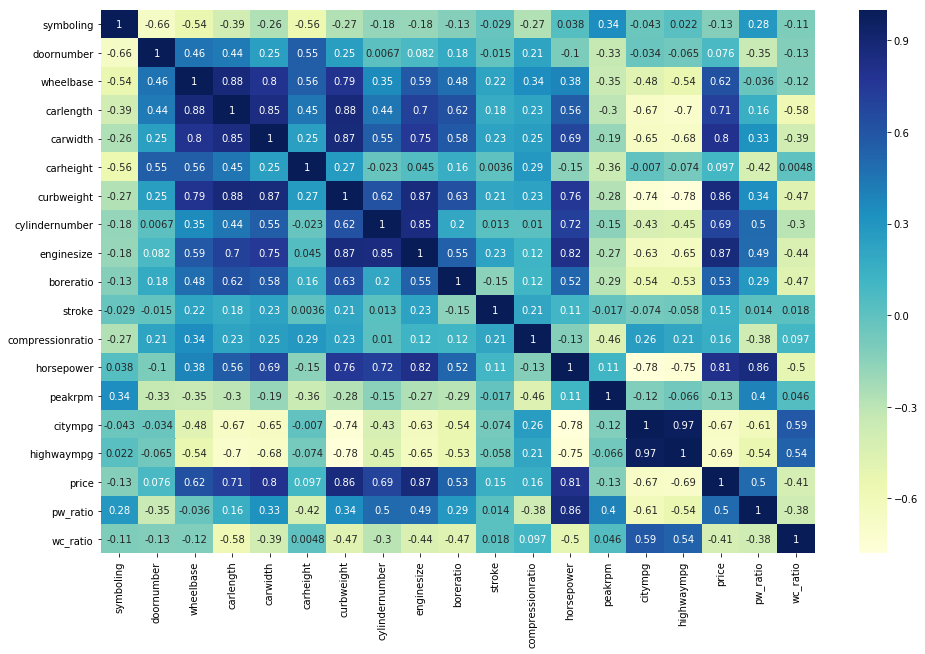

In [54]:
#Let's check the correlation coefficients of all the numeric variables except dummies to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(df_train[scale_vars].corr(), annot = True, cmap="YlGnBu")
plt.show()


##### We can observe that enginesize is the most correlated to price, lets see a pairplot for 'enginesize' vs 'price'.

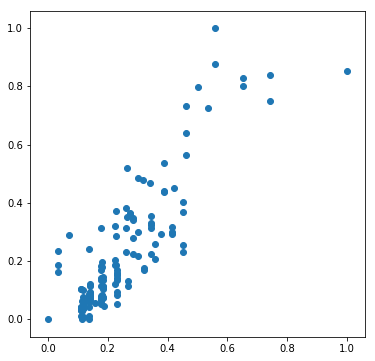

In [55]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.enginesize, df_train.price)
plt.show()

#### The other variables that are highly correlated to price are:
    - curbweight
    - horsepower
    - carwidth
    - carlength
    - cylindernumber
    - highwaympg (negatively correlated)
    - citympg (negatively correlated)
    - wheelbase
    - boreratio
    - pw_ratio (negatively correlated)
    

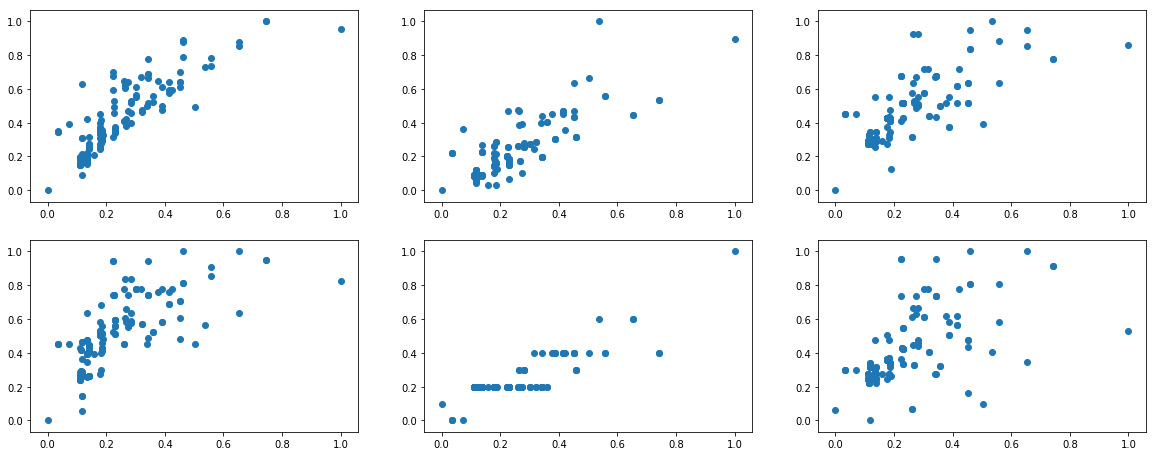

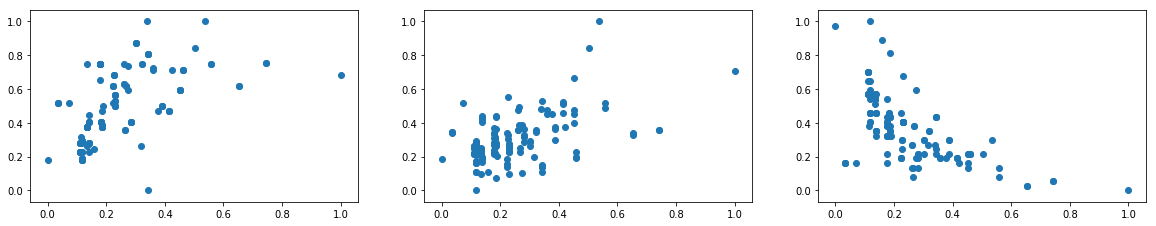

In [56]:
#Lets see the correlations of the above features to enginesize
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
plt.scatter(df_train.enginesize, df_train.curbweight)
plt.subplot(3,3,2)
plt.scatter(df_train.enginesize, df_train.horsepower)
plt.subplot(3,3,3)
plt.scatter(df_train.enginesize, df_train.carwidth)
plt.subplot(3,3,4)
plt.scatter(df_train.enginesize, df_train.carlength)
plt.subplot(3,3,5)
plt.scatter(df_train.enginesize, df_train.cylindernumber)
plt.subplot(3,3,6)
plt.scatter(df_train.enginesize, df_train.wheelbase)
plt.figure(figsize=(20, 12))
plt.subplot(3,3,7)
plt.scatter(df_train.enginesize, df_train.boreratio)
plt.subplot(3,3,8)
plt.scatter(df_train.enginesize, df_train.pw_ratio)
plt.subplot(3,3,9)
plt.scatter(df_train.enginesize, df_train.highwaympg)



plt.show()

Since most of the other hightly correlated variables like 'curbweight','horsepower','carwidth','carlength', 'cylindernumber' are hightly correlated to enginesize, we pick 'enginesize' as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [57]:
y_train = df_train.pop('price')
X_train = df_train

In [58]:
X_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,0.6,1.0,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,0.139623,0.230159,...,0,0,1,0,0,0,0,0,0,0
125,1.0,0.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,0.339623,1.000000,...,0,0,0,1,0,0,0,0,0,0
166,0.6,0.0,0.272414,0.448780,0.308333,0.424779,0.314973,0.2,0.139623,0.444444,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.2,0.260377,0.626984,...,0,0,0,0,0,0,0,0,0,0
199,0.2,1.0,0.610345,0.775610,0.575000,0.858407,0.647401,0.2,0.260377,0.746032,...,0,0,0,0,0,0,0,0,0,1


In [59]:
y_train.head()

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
Name: price, dtype: float64

## Step 5: Building a linear model with only one variable : Enginesize

In [60]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize']]) 
# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [61]:
# Check the parameters obtained
lr.params

const        -0.072888
enginesize    1.210676
dtype: float64

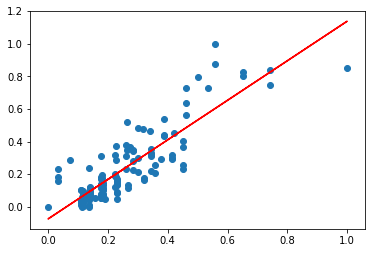

In [62]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], -0.072888 + 1.210676*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [63]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.09e-44
Time:                        17:46:52   Log-Likelihood:                 117.01
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     141   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.017     -4.362      0.0

#### We have fairly good model with just enginesize as the predictor variable with R-squared value of 0.753 and Adj. R-squared value of 0.752.

#### Let's see which other variables could be used for our model. We will be using RFE for this.

### Using RFE for feature selection

The R-squared and adjusted R-squared values obtained by just using 'enginesize' are 0.753 and 0.752 respectively. Since we have so many variables, let's use RFE to get the best features for our use-case

In [64]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [65]:
# Running RFE with the output number of the variable equal to 30
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 30)             
rfe = rfe.fit(X_train, y_train)

In [66]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 25),
 ('doornumber', False, 28),
 ('wheelbase', False, 3),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 21),
 ('compressionratio', False, 6),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', False, 24),
 ('highwaympg', False, 17),
 ('pw_ratio', True, 1),
 ('wc_ratio', True, 1),
 ('gas', False, 13),
 ('turbo', True, 1),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 23),
 ('rwd', False, 26),
 ('rear', True, 1),
 ('dohcv', False, 5),
 ('l', True, 1),
 ('ohc', False, 22),
 ('ohcf', True, 1),
 ('ohcv', False, 29),
 ('rotor', True, 1),
 ('2bbl', False, 18),
 ('4bbl', True, 1),
 ('idi', False, 15),
 ('mfi', False, 30),
 ('mpfi', False, 20),
 ('spdi', False, 19),
 ('spfi', False, 31),
 ('audi', False, 14),
 ('bmw', True, 1),
 ('buick', True, 1),
 (

In [67]:
col = X_train.columns[rfe.support_]
col

Index(['carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'horsepower', 'peakrpm', 'pw_ratio',
       'wc_ratio', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'rear',
       'l', 'ohcf', 'rotor', '4bbl', 'bmw', 'buick', 'dodge', 'mitsubishi',
       'peugeot', 'plymouth', 'porsche', 'saab', 'subaru'],
      dtype='object')

In [68]:
X_train.columns[~rfe.support_]

Index(['symboling', 'doornumber', 'wheelbase', 'stroke', 'compressionratio',
       'citympg', 'highwaympg', 'gas', 'fwd', 'rwd', 'dohcv', 'ohc', 'ohcv',
       '2bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'chevrolet',
       'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'nissan', 'renault',
       'toyota', 'volkswagen', 'volvo'],
      dtype='object')

### Selecting one feature at a time (Forward Selection)

In [69]:
# Creating X_test dataframe with one of the RFE selected variables: pw_ratio 
# (pw_ratio is comprised of horsepower as well as curbweight, both of which are highly correlated to price)
X_train_rfe = X_train['pw_ratio']

In [70]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [71]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     47.65
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.60e-10
Time:                        17:46:52   Log-Likelihood:                 37.763
No. Observations:                 143   AIC:                            -71.53
Df Residuals:                     141   BIC:                            -65.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0143      0.037     -0.384      0.7

In [72]:
# Add another variable: carwidth
X_train_rfe = X_train[['pw_ratio','carwidth']]

In [73]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [74]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     167.1
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           8.18e-38
Time:                        17:46:52   Log-Likelihood:                 104.17
No. Observations:                 143   AIC:                            -202.3
Df Residuals:                     140   BIC:                            -193.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2905      0.030     -9.636      0.0

In [75]:
#Let's calculate VIF for this new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,pw_ratio,4.97
1,carwidth,4.97


Since both the variables pw_ratio and carwidth are statistically significant and have VIF below 5, we keep them.

In [76]:
#Add another variable: enginesize
X_train_rfe = X_train[['pw_ratio','carwidth','enginesize']]

In [77]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [78]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     200.4
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           2.80e-50
Time:                        17:46:52   Log-Likelihood:                 136.54
No. Observations:                 143   AIC:                            -265.1
Df Residuals:                     139   BIC:                            -253.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2079      0.026     -8.045      0.0

In [79]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,9.59
2,enginesize,8.35
0,pw_ratio,5.35


Since introduction of 'enginesize' increases the VIF, let's drop it from our model.

In [80]:
#Add another variable: wc_ratio
X_train_rfe = X_train[['pw_ratio','carwidth','wc_ratio']]

In [81]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [82]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     111.0
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           9.88e-37
Time:                        17:46:52   Log-Likelihood:                 104.37
No. Observations:                 143   AIC:                            -200.7
Df Residuals:                     139   BIC:                            -188.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2660      0.049     -5.375      0.0

In [83]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,5.70
0,pw_ratio,5.20
2,wc_ratio,2.67


We notice that adding wc_ratio introduces multicollinearity in the model and also is statistically insignificant. So we drop it from our model.

In [84]:
#Add another variable: carlength
X_train_rfe = X_train[['pw_ratio','carwidth','carlength']]

In [85]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [86]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.64e-38
Time:                        17:46:52   Log-Likelihood:                 108.60
No. Observations:                 143   AIC:                            -209.2
Df Residuals:                     139   BIC:                            -197.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3251      0.032    -10.306      0.0

In [87]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,29.67
2,carlength,24.57
0,pw_ratio,4.99


Carlength introduces a lot of multicollinearity in our model even though it is statistically significant. Let's drop it.

In [88]:
#Add another variable: carheight
X_train_rfe = X_train[['pw_ratio','carwidth','carheight']]

In [89]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [90]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     111.7
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           7.34e-37
Time:                        17:46:52   Log-Likelihood:                 104.68
No. Observations:                 143   AIC:                            -201.4
Df Residuals:                     139   BIC:                            -189.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3209      0.043     -7.472      0.0

In [91]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,10.15
0,pw_ratio,5.08
2,carheight,4.96


Carheight is statistically insignificant and also raises the VIF value. We drop it from our model.

In [92]:
#Add another variable: curbweight
X_train_rfe = X_train[['pw_ratio','carwidth','curbweight']]

In [93]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [94]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     182.7
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           4.99e-48
Time:                        17:46:52   Log-Likelihood:                 131.20
No. Observations:                 143   AIC:                            -254.4
Df Residuals:                     139   BIC:                            -242.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2432      0.026     -9.451      0.0

In [95]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,22.94
2,curbweight,19.39
0,pw_ratio,4.97


We notice that introducing curbweight improves our R-squared and Adj. R-squared values a great deal (from 0.701 to 0.793). But it introduces a lot of multicollinearity and also increases the p-value of carwidth.
Since, we know from our correlation matrix which we plotted previously that curbweight is highly correlated to price, lets keep it and remove carwidth and then reassess our model.

In [96]:
#Drop variable: carwidth
X_train_rfe = X_train[['pw_ratio','curbweight']]

In [97]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [98]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     264.4
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           2.86e-48
Time:                        17:46:53   Log-Likelihood:                 128.77
No. Observations:                 143   AIC:                            -251.5
Df Residuals:                     140   BIC:                            -242.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2145      0.022     -9.558      0.0

In [99]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,pw_ratio,4.2
1,curbweight,4.2


Perfect! We see that the model performance did not do down a lot (dropped by only 0.005) and also the VIF values are all under 5. Let's retain curbweight and pw_ratio and add more variables.

In [100]:
#Add another variable: cylindernumber
X_train_rfe = X_train[['pw_ratio','curbweight','cylindernumber']]

In [101]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [102]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     194.0
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.76e-49
Time:                        17:46:53   Log-Likelihood:                 134.64
No. Observations:                 143   AIC:                            -261.3
Df Residuals:                     139   BIC:                            -249.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2295      0.022    -10.

In [103]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,cylindernumber,9.82
1,curbweight,7.09
0,pw_ratio,6.07


Although adding cylindernumber increases our overall model performance, it introduces multicollinarity, so lets drop it.

In [104]:
#Add another variable: boreratio
X_train_rfe = X_train[['pw_ratio','curbweight','boreratio']]

In [105]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [106]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     175.9
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           3.98e-47
Time:                        17:46:53   Log-Likelihood:                 129.06
No. Observations:                 143   AIC:                            -250.1
Df Residuals:                     139   BIC:                            -238.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2058      0.025     -8.144      0.0

In [107]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,boreratio,8.95
1,curbweight,8.17
0,pw_ratio,5.03


Boreratio is statistically insignificant and also increases the VIF of our data. Let's drop it and try other variables.

In [108]:
#Add another variable: horsepower
X_train_rfe = X_train[['pw_ratio','curbweight','horsepower']]

In [109]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [110]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     186.0
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.83e-48
Time:                        17:46:53   Log-Likelihood:                 132.23
No. Observations:                 143   AIC:                            -256.5
Df Residuals:                     139   BIC:                            -244.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0048      0.083     -0.058      0.9

In [111]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,horsepower,15.85
0,pw_ratio,9.75
1,curbweight,6.83


No surprises here! Horsepower is highly correlated to pw_ratio and hence not only increases the multicollinearity of the model but also makes the other variables insignificant. Let's drop it.

In [112]:
#Add another variable: peakrpm
X_train_rfe = X_train[['pw_ratio','curbweight','peakrpm']]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     175.0
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           5.24e-47
Time:                        17:46:53   Log-Likelihood:                 128.77
No. Observations:                 143   AIC:                            -249.5
Df Residuals:                     139   BIC:                            -237.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2125      0.029     -7.354      0.0

In [113]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,pw_ratio,9.23
2,peakrpm,4.89
1,curbweight,4.30


Let's drop peakrpm as it is statistically insignificant and increases the VIF and reduces our current best Adj R-Squared value by 0.002

In [114]:
#Add another variable: turbo
X_train_rfe = X_train[['pw_ratio','curbweight','turbo']]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     182.8
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           4.85e-48
Time:                        17:46:53   Log-Likelihood:                 131.23
No. Observations:                 143   AIC:                            -254.5
Df Residuals:                     139   BIC:                            -242.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2183      0.022     -9.831      0.0

In [115]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,4.62
0,pw_ratio,4.20
2,turbo,1.36


Adding turbo increases our Adj. R-squared value, is statistically significant and also doesn't take our VIF beyond 5. Let's retain it.

In [116]:
#Add another variable: hardtop
X_train_rfe = X_train[['pw_ratio','curbweight','turbo','hardtop']]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     138.7
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           2.50e-47
Time:                        17:46:53   Log-Likelihood:                 132.32
No. Observations:                 143   AIC:                            -254.6
Df Residuals:                     138   BIC:                            -239.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2164      0.022     -9.771      0.0

In [117]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,4.66
0,pw_ratio,4.39
2,turbo,1.37
3,hardtop,1.07


Let's remove 'hardtop' as it is statistically insignificant.

In [118]:
#Add another variable: hatchback
X_train_rfe = X_train[['pw_ratio','curbweight','turbo','hatchback']]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     139.7
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.72e-47
Time:                        17:46:53   Log-Likelihood:                 132.70
No. Observations:                 143   AIC:                            -255.4
Df Residuals:                     138   BIC:                            -240.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2055      0.023     -8.823      0.0

In [119]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,pw_ratio,5.78
1,curbweight,4.96
3,hatchback,1.65
2,turbo,1.36


Hatchback isn't statistically significant and increases the multicollinearity. Let's drop it from our model.

In [120]:
#Add another variable: sedan
X_train_rfe = X_train[['pw_ratio','curbweight','turbo','sedan']]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     145.7
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.66e-48
Time:                        17:46:53   Log-Likelihood:                 135.14
No. Observations:                 143   AIC:                            -260.3
Df Residuals:                     138   BIC:                            -245.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2388      0.023    -10.428      0.0

In [121]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,5.31
0,pw_ratio,4.21
3,sedan,1.80
2,turbo,1.36


We can notice that introduction of sedan increases the Adj. R-squared value but increases the p-value of turbo while being statistically significant itselt. Let's try dropping turbo and reassess our model.

In [122]:
#Drop variable: turbo
X_train_rfe = X_train[['pw_ratio','curbweight','sedan']]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     186.8
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.45e-48
Time:                        17:46:53   Log-Likelihood:                 132.47
No. Observations:                 143   AIC:                            -256.9
Df Residuals:                     139   BIC:                            -245.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2347      0.023    -10.128      0.0

In [123]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,4.88
0,pw_ratio,4.21
2,sedan,1.80


Since our overall model improved with the addition of sedan and exclusion of turbo, let's retain this combination of varibles and add new ones.

In [124]:
#Add another variable: wagon
X_train_rfe = X_train[['pw_ratio','curbweight','sedan','wagon']]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     145.6
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.71e-48
Time:                        17:46:53   Log-Likelihood:                 135.11
No. Observations:                 143   AIC:                            -260.2
Df Residuals:                     138   BIC:                            -245.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2140      0.025     -8.707      0.0

In [125]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,6.23
0,pw_ratio,4.36
2,sedan,2.10
3,wagon,1.42


Since wagon makes sedan statistically insignificant but increases the Adj. R-squared and introduces some multicollinearity, let's drop sedan and reassess our model.

In [126]:
#Drop variable: sedan
X_train_rfe = X_train[['pw_ratio','curbweight','wagon']]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     192.4
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           2.79e-49
Time:                        17:46:53   Log-Likelihood:                 134.17
No. Observations:                 143   AIC:                            -260.3
Df Residuals:                     139   BIC:                            -248.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1995      0.022     -9.004      0.0

In [127]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,4.80
0,pw_ratio,4.36
2,wagon,1.22


Everything looks good, our model's R-squared and Adj. R-squared have improved and VIF values are under 5. Let's add some more variables.

In [128]:
#Add another variable: rear
X_train_rfe = X_train[['pw_ratio','curbweight','wagon','rear']]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     163.0
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           2.99e-51
Time:                        17:46:53   Log-Likelihood:                 141.71
No. Observations:                 143   AIC:                            -273.4
Df Residuals:                     138   BIC:                            -258.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1822      0.022     -8.453      0.0

In [129]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,4.98
0,pw_ratio,4.71
2,wagon,1.22
3,rear,1.09


Let's retain rear as it improves our model and also is statistically significant.

In [130]:
#Add another variable: l
X_train_rfe = X_train[['pw_ratio','curbweight','wagon','rear','l']]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     140.2
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           4.51e-52
Time:                        17:46:53   Log-Likelihood:                 146.43
No. Observations:                 143   AIC:                            -280.9
Df Residuals:                     137   BIC:                            -263.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1731      0.021     -8.192      0.0

In [131]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,5.95
0,pw_ratio,5.25
4,l,1.27
2,wagon,1.22
3,rear,1.10


We see that 'l' improves our R-squared and Adj. R-squared values but introduces some multicollinearity and increases the p-value of pw_ratio. Let's remove pw_ratio and reassess our model.

In [132]:
#Drop variable: sedan
X_train_rfe = X_train[['curbweight','wagon','rear','l']]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     169.0
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           3.80e-52
Time:                        17:46:53   Log-Likelihood:                 143.85
No. Observations:                 143   AIC:                            -277.7
Df Residuals:                     138   BIC:                            -262.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1429      0.017     -8.647      0.0

In [133]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,1.28
1,wagon,1.19
3,l,1.14
2,rear,1.01


Since removal of pw_ratio dropped the multicollinearity in our model drastically and also decreased all the p-values to 0, let's retain this combination of variables

In [134]:
#Add another variable: ohcf
X_train_rfe = X_train[['curbweight','wagon','rear','l','ohcf']]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     135.5
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           3.09e-51
Time:                        17:46:53   Log-Likelihood:                 144.41
No. Observations:                 143   AIC:                            -276.8
Df Residuals:                     137   BIC:                            -259.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1391      0.017     -8.219      0.0

In [135]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,1.30
1,wagon,1.26
4,ohcf,1.21
3,l,1.15
2,rear,1.10


Let's remove ohcf as it is statistically insignificant and has had no effect on our Adj. R-squared value.

In [136]:
#Drop variable: ohcf, Add another variable: rotor
X_train_rfe = X_train[['curbweight','wagon','rear','l','rotor']]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     134.7
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           4.35e-51
Time:                        17:46:53   Log-Likelihood:                 144.05
No. Observations:                 143   AIC:                            -276.1
Df Residuals:                     137   BIC:                            -258.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1441      0.017     -8.643      0.0

In [137]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,1.31
1,wagon,1.20
3,l,1.14
4,rotor,1.02
2,rear,1.01


Let's remove rotor as it is statistically insignificant and add other variables instead.

In [138]:
#Add another variable: 4bbl
X_train_rfe = X_train[['curbweight','wagon','rear','l','4bbl']]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     134.3
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           5.08e-51
Time:                        17:46:53   Log-Likelihood:                 143.89
No. Observations:                 143   AIC:                            -275.8
Df Residuals:                     137   BIC:                            -258.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1434      0.017     -8.600      0.0

In [139]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,1.30
1,wagon,1.20
3,l,1.14
4,4bbl,1.02
2,rear,1.01


Let's remove 4bbl as it is statistically insignificant and add other variables instead.

In [140]:
#Add another variable: bmw
X_train_rfe = X_train[['curbweight','wagon','rear','l','bmw']]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     190.0
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           8.67e-60
Time:                        17:46:53   Log-Likelihood:                 165.04
No. Observations:                 143   AIC:                            -318.1
Df Residuals:                     137   BIC:                            -300.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1376      0.014     -9.601      0.0

In [141]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,1.40
1,wagon,1.21
3,l,1.15
4,bmw,1.09
2,rear,1.01


Since addition of bmw improves our Adj. R-squared greatly (0.869 from 0.826) and is statistically significant, we retain it.

In [142]:
#Add another variable: buick
X_train_rfe = X_train[['curbweight','wagon','rear','l','bmw','buick']]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     175.4
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.81e-61
Time:                        17:46:53   Log-Likelihood:                 171.95
No. Observations:                 143   AIC:                            -329.9
Df Residuals:                     136   BIC:                            -309.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1210      0.014     -8.400      0.0

In [143]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,1.62
1,wagon,1.21
5,buick,1.18
3,l,1.17
4,bmw,1.11
2,rear,1.01


We retain buick as it improves our model.

In [144]:
#Add another variable: dodge
X_train_rfe = X_train[['curbweight','wagon','rear','l','bmw','buick','dodge']]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     149.3
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           2.48e-60
Time:                        17:46:54   Log-Likelihood:                 171.96
No. Observations:                 143   AIC:                            -327.9
Df Residuals:                     135   BIC:                            -304.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1216      0.015     -8.083      0.0

In [145]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,1.64
1,wagon,1.21
5,buick,1.18
3,l,1.17
4,bmw,1.11
2,rear,1.01
6,dodge,1.01


Since dodge is statistically insignificant, we drop it.

In [146]:
#Add another variable: mitsubishi
X_train_rfe = X_train[['curbweight','wagon','rear','l','bmw','buick','mitsubishi']]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     156.5
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.50e-61
Time:                        17:46:54   Log-Likelihood:                 174.95
No. Observations:                 143   AIC:                            -333.9
Df Residuals:                     135   BIC:                            -310.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1153      0.014     -8.035      0.0

In [147]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,1.72
1,wagon,1.22
5,buick,1.19
3,l,1.17
4,bmw,1.11
6,mitsubishi,1.06
2,rear,1.01


Let's retain mitsubishi as it improves the Adj. R-squared by 0.004 and is statistically significant.

In [148]:
#Add another variable: peugeot
X_train_rfe = X_train[['curbweight','wagon','rear','l','bmw','buick','mitsubishi','peugeot']]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     148.8
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           8.77e-63
Time:                        17:46:54   Log-Likelihood:                 180.74
No. Observations:                 143   AIC:                            -343.5
Df Residuals:                     134   BIC:                            -316.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1282      0.014     -8.930      0.0

In [149]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,peugeot,9.20
3,l,9.00
0,curbweight,1.75
1,wagon,1.22
5,buick,1.19
4,bmw,1.11
6,mitsubishi,1.06
2,rear,1.01


We can see that the addition of peugeot improved our Adj. R-squared but introduced multicollinearity and made 'l' insignificant. Let's remove 'l' and reassess our model.

In [150]:
#Dropping variable: l
X_train_rfe = X_train[['curbweight','wagon','rear','bmw','buick','mitsubishi','peugeot']]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     166.9
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           3.17e-63
Time:                        17:46:54   Log-Likelihood:                 179.05
No. Observations:                 143   AIC:                            -342.1
Df Residuals:                     135   BIC:                            -318.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1231      0.014     -8.678      0.0

In [151]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,1.75
1,wagon,1.22
6,peugeot,1.20
4,buick,1.19
3,bmw,1.11
5,mitsubishi,1.06
2,rear,1.01


We see that removing l and adding peugeot from our model improves its Adj. R-squared and doesn't increase the VIF values to more than 5. So, lets retain this combination of variables and try adding thr remaining features incrementally.

In [152]:
#Add another variable: plymouth
X_train_rfe = X_train[['curbweight','wagon','rear','bmw','buick','mitsubishi','peugeot','plymouth']]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     145.1
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           3.95e-62
Time:                        17:46:54   Log-Likelihood:                 179.13
No. Observations:                 143   AIC:                            -340.3
Df Residuals:                     134   BIC:                            -313.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1219      0.015     -8.375      0.0

In [153]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,1.77
1,wagon,1.22
6,peugeot,1.20
4,buick,1.19
3,bmw,1.12
5,mitsubishi,1.06
2,rear,1.01
7,plymouth,1.01


Let's get rid of plymouth as it is statistically insignificant and has almost no effect on Adj. R-squared.

In [154]:
#Add another variable: porsche
X_train_rfe = X_train[['curbweight','wagon','rear','bmw','buick','mitsubishi','peugeot','porsche']]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     166.7
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           9.17e-66
Time:                        17:46:54   Log-Likelihood:                 188.10
No. Observations:                 143   AIC:                            -358.2
Df Residuals:                     134   BIC:                            -331.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1183      0.013     -8.823      0.0

In [155]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,1.83
7,porsche,1.57
2,rear,1.50
1,wagon,1.22
6,peugeot,1.21
4,buick,1.20
3,bmw,1.12
5,mitsubishi,1.06


We keep porsche as it improves our model and is statistically significant.

In [156]:
#Add another variable: saab
X_train_rfe = X_train[['curbweight','wagon','rear','bmw','buick','mitsubishi','peugeot','porsche','saab']]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     147.1
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.21e-64
Time:                        17:46:54   Log-Likelihood:                 188.11
No. Observations:                 143   AIC:                            -356.2
Df Residuals:                     133   BIC:                            -326.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1183      0.013     -8.792      0.0

In [157]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,1.91
7,porsche,1.57
2,rear,1.50
1,wagon,1.23
4,buick,1.21
6,peugeot,1.21
3,bmw,1.13
5,mitsubishi,1.07
8,saab,1.05


Let's remove saab as it is statistically insignificant and try other variables.

In [158]:
#Add another variable: subaru
X_train_rfe = X_train[['curbweight','wagon','rear','bmw','buick','mitsubishi','peugeot','porsche','subaru']]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     149.0
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           5.66e-65
Time:                        17:46:54   Log-Likelihood:                 188.94
No. Observations:                 143   AIC:                            -357.9
Df Residuals:                     133   BIC:                            -328.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1149      0.014     -8.421      0.0

In [159]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,1.88
7,porsche,1.57
2,rear,1.50
1,wagon,1.29
6,peugeot,1.23
4,buick,1.21
3,bmw,1.12
8,subaru,1.12
5,mitsubishi,1.07


Let's remove subaru as it is statistically insignificant and that would leave us with curbweight, wagon, rear, bmw, buick, mitsubishi, peugeot and porsche as the main predictor variables for our dependent variable: price.

If we observe carefully, we can notice that all the top-priced cars like buick,bmw and porsche are included in our model except jaguar (which has the highest mean price of all cars). Let's see if adding jaguar could increase our R-squared and Adj. R-squared values further.

In [160]:
#Add another variable: jaguar
X_train_rfe = X_train[['curbweight','wagon','rear','bmw','buick','mitsubishi','peugeot','porsche','jaguar']]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     165.7
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           9.24e-68
Time:                        17:46:54   Log-Likelihood:                 195.87
No. Observations:                 143   AIC:                            -371.7
Df Residuals:                     133   BIC:                            -342.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0955      0.014     -6.817      0.0

In [161]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe
X_train_new = X_train_new.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,2.22
7,porsche,1.58
2,rear,1.50
1,wagon,1.26
4,buick,1.24
6,peugeot,1.24
8,jaguar,1.21
3,bmw,1.15
5,mitsubishi,1.08


Since jaguar is statistically significant and improves our model, let's keep it.

Again, from our carname vs price visualization, we can find that most of the low price range cars like dodge,honda,plymouth and subaru have been added to the model expect toyota. Let's add that next and see its influnce of the overall model.

In [162]:
#Add another variable: toyota
X_train_rfe = X_train[['curbweight','wagon','rear','bmw','buick','mitsubishi','peugeot','porsche','jaguar','toyota']]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     160.1
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.05e-68
Time:                        17:46:54   Log-Likelihood:                 201.05
No. Observations:                 143   AIC:                            -380.1
Df Residuals:                     132   BIC:                            -347.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0914      0.014     -6.705      0.0

In [163]:
#Let's calculate VIF for this new model
X_train_new = X_train_rfe
X_train_new = X_train_new.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,2.62
7,porsche,1.60
2,rear,1.50
4,buick,1.29
6,peugeot,1.29
1,wagon,1.26
8,jaguar,1.25
9,toyota,1.24
3,bmw,1.17
5,mitsubishi,1.09


toyota indeed adds value to our model and even improves the p-value of mitsubishi. It is also statistically significant. Since our model now has a healthy mix of car attributes and car brands (higher priced as well as lower priced segments) and a good R-squared of 0.924 and Adj. R-squared of 0.918, let's stop here and begin predicting prices with this model (yay!)

## Residual Analysis of the train data

Now, let's check if the error terms are also normally distributed and for that, let us plot the histogram of the error terms and see what it looks like.

In [164]:
y_train_price = lm.predict(X_train_rfe)


Text(0.5, 0, 'Errors')

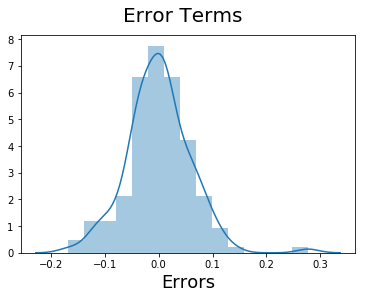

In [165]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 15)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

## Making Predictions

#### Applying the scaling on the test sets

In [166]:
scale_vars = ['symboling','doornumber','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber', \
             'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price','pw_ratio','wc_ratio']

df_test[scale_vars] = scaler.transform(df_test[scale_vars])

#### Dividing into X_test and y_test

In [167]:
y_test = df_test.pop('price')
X_test = df_test

In [168]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train_new = X_train_rfe.drop(["const"], axis = 1)
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [169]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

#### Plotting y_test and y_pred to understand the spread.

Text(0, 0.5, 'y_pred')

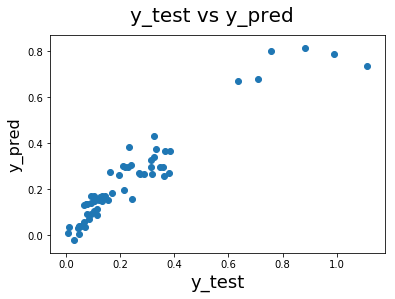

In [170]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#### Using regression score function from sklearn

In [171]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)  

0.8930191224615649

Since the r2 score from sklearn metrics is also very close to the one obtained by statsmodels, our model is in good shape. Let's now get down to interpreting our analysis for Geely Auto!

## Step 6: Interpreting the results of our analysis

Geely Auto wants to understand the factors affecting the pricing of cars in the American market, so lets use our model features and see how it influences the price of cars.


### 1. Model Features 

#### The features that best predict the price of a car in the American market ( in descending order of importance ):
    - curbweight (coeff: 0.7596)
    - rear       (coeff: 0.2953)
    - bmw        (coeff: 0.2563)
    - porsche    (coeff: 0.2211)
    - buick      (coeff: 0.1686)
    - jaguar     (coeff: 0.1576)
    - peugeot    (coeff: -0.1089)
    - toyota     (coeff: -0.0486)
    - mitsubishi (coeff: -0.0617)
    - wagon      (coeff: -0.0680)
    

### 2. Features Highly Correlated With Model Features

#### The following features are higly correlated to curbweight (which is our most significant predictor) and hence are good predictors of car prices themselves:
    - enginesize
    - horsepower
    - carwidth
    - cylindernumber
    - carlength
 

Let's verify the correlation between curbweight and the features listed above by a Correlation Matrix

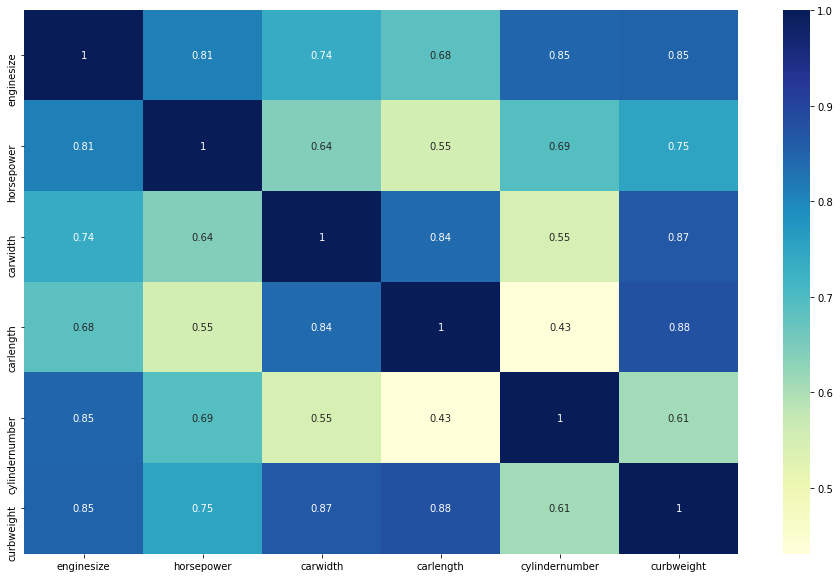

In [172]:
corr_predictors = ['enginesize','horsepower','carwidth','carlength','cylindernumber','curbweight']
plt.figure(figsize = (16, 10))
sns.heatmap(car_prices[corr_predictors].corr(), annot = True, cmap="YlGnBu")
plt.show()

Now, lets verify that the above features are indeed correlated to price by another Correlation Matrix

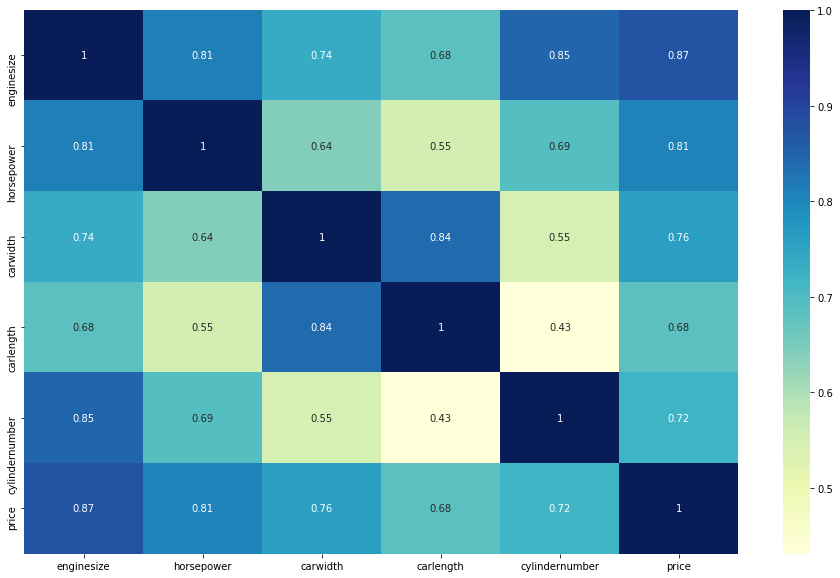

In [173]:
corr_predictors = ['enginesize','horsepower','carwidth','carlength','cylindernumber','price']
plt.figure(figsize = (16, 10))
sns.heatmap(car_prices[corr_predictors].corr(), annot = True, cmap="YlGnBu")
plt.show()

Thus, we can safely say that along with curbweight and all the other features that were obtained from our model, a car's enginesize, horsepower, carwidth, carlength and the number of cylinders are also very good predictors of price.

## Conclusion

In conclusion, we can note that the *curbweight* of a car, which is the weight of a car without occupants or baggage, is the most significant predictor of its price. As the curbweight (or kerb weight) increases, its price also increases. 

The curbweight is hightly dependent/related to the size of the engine, the number of cylinders present, the amount of horsepower that gets generated as well as the dimensions of the car, most notably the car width and the car length. Hence these features could also very well predict the price of a car. The higher the value of these features, the higher the car's price in the market.

One interesting feature for a car's price came out to be the *location of its engine*. Our model suggests that if the car's engine is located at the *rear*, its price is higher. 

Another important predictor that influences the price of a car is the *body type* of a car. It was found that if a car belongs to a *'wagon'* body type, its price will be lower (as compared to other body types like convertibles or sedans).

Apart from the typical design features present in the car, it's also important to know the major players in the US automobile market and how certain automobile companies have a great influence on the pricing of cars. 

As per our model, we found out that car companies *BMW, Porsche, Buick,and Jaguar* manufacture high end cars that sell at a much higher price in the market than other car brands. So, if a car is from any of these brands, their price will be on the higher side.
In contrast, car companies like *Peugeot, Toyota and Mitsubishi* are the manufacturers of lower priced cars. 

Based on these observations, Geely Auto can now make informed decisions on how to manipulate the design of the cars and formulate their business strategy for entering the US market.